# Hackathon: Predict the batch performance of machines.

### Team Members: Samantha, Abhineet, Monika and Soumya

## Problem Statement

Data is being recorded from various condition monitoring sensors in a manufacturing plant. There are hundreds of such sensors which may be impacting the quality of final product which is getting manufactured. Batch performance is related to the machine’s state which is being captured by those 54 sensors. The task is to predict the batch performance of machines.

## Data Overview

- Input parameters are the sensors attached to a machine, which are 54 in number. In the dataset, they are named as x0, x1, x2 … x54.
- Since this is a batch manufacturing, a batch is of a certain time period, say t0 is the batch start and t6 is the batch end.  - Sensor values being recorded at time instance t0, t1, t2 … t6 are labeled as x0_t0, x0_t1, x0_t2 … x0_t6 respectively in the dataset, similarly for the others.
- All values are numerical (float or binary), there are no string or multiclass type features.
- There is output parameter y2 which has to be considered independently. They describe the batch performance.
- All the sensors attached to the machine are physically independent although there can be statistical dependency present in their values.
- Rows in the dataset represent batches. Row numbers are important as they are sorted time-wise. Although batches are considered independent to each other, there may be statistical dependency among them.

## Objective for the hackathon
Achieve the highest possible R2 score for label y2. You can shuffle the data while train-test splitting.

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.utils import resample,shuffle
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 400) 

In [2]:
# reading the train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# glimpse of the train data
train.head()

Id       x0_t0       x0_t1       x0_t2       x0_t3       x0_t4  \
0  706  762.212216  753.162754  754.610620  762.787135  768.170347   
1  239  762.671780  746.631882  745.807832  755.992886  761.814347   
2  613  766.867777  756.642963  750.059697  756.377980  760.087594   
3  588  751.077287  758.230866  761.391167  763.190054  768.715192   
4  780  772.430815  772.254344  772.322597  771.926261  768.820073   

        x0_t5       x0_t6     x1_t0     x1_t1     x1_t2     x1_t3     x1_t4  \
0  769.815486  750.950000  0.902534  0.873314  0.807268  0.862909  0.836029   
1  766.110745  762.535189  1.366119  1.358298  1.304489  1.369799  1.483810   
2  758.380275  750.950000  0.821431  0.825063  0.775300  0.891820  0.764695   
3  770.447814  750.950000  0.712874  0.744777  0.721926  0.705900  0.684055   
4  772.908223  750.950000  0.742664  0.676266  0.734769  0.604975  0.772111   

      x1_t5    x1_t6  x2_t0  x2_t1  x2_t2  x2_t3  x2_t4  x2_t5  x2_t6  \
0  0.902826  1.37600    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
1  1.410581  1.36387    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
2  0.595725  1.37600    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
3  0.713621  1.37600    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
4  0.853173  1.37600    1.0    1.0    1.0    1.0    1.0    1.0    1.0   

       x3_t0      x3_t1      x3_t2      x3_t3      x3_t4      x3_t5  \
0  21.262724  21.044805  21.449664  20.734400  21.135345  20.868361   
1  26.935492  26.917903  26.812166  27.046565  26.728962  26.987791   
2  18.090036  21.859335  22.043087  22.042797  21.839760  22.125842   
3  28.360028  28.506406  28.253319  28.475223  28.229994  28.510415   
4  19.049664  18.901242  18.868833  20.118346  20.220839   9.598223   

       x3_t6  x4_t0  x4_t1  x4_t2  x4_t3  x4_t4  x4_t5  x4_t6       x5_t0  \
0  27.900000    6.7    6.7    6.7    6.7    6.7    6.7    6.9  748.773616   
1  26.839536    6.5    6.5    6.5    6.5    6.5    6.5    6.5  720.968536   
2  27.900000    6.9    6.9    6.9    6.9    6.9    6.9    6.9  762.066151   
3  27.900000    6.9    6.9    6.9    6.9    6.9    6.9    6.9  748.069853   
4  27.900000    6.8    6.8    6.8    6.8    6.8    6.8    6.9  760.601702   

        x5_t1       x5_t2       x5_t3       x5_t4       x5_t5       x5_t6  \
0  745.635196  745.722604  747.266661  753.433793  752.713959  746.300000   
1  756.933242  752.990770  745.632089  754.609085  756.834330  759.210858   
2  768.275771  758.085709  772.244863  999.730981  935.122589  746.300000   
3  752.061262  759.559203  757.753112  756.633643  752.604253  746.300000   
4  761.567663  762.897188  764.388612  766.475680  763.649507  746.300000   

        x6_t0       x6_t1       x6_t2       x6_t3       x6_t4       x6_t5  \
0  788.799988  788.799988  788.799988  788.799988  788.799988  788.799988   
1  845.599976  845.599976  845.599976  845.599976  845.599976  845.599976   
2  792.700012  792.700012  792.700012  792.700012  792.700012  792.700012   
3  792.700012  792.700012  792.700012  792.700012  792.700012  792.700012   
4  772.599976  772.599976  772.599976  772.599976  772.599976  772.599976   

        x6_t6       x7_t0       x7_t1       x7_t2       x7_t3       x7_t4  \
0  795.830000  810.299988  810.299988  810.299988  810.299988  810.299988   
1  845.599976  840.799988  840.799988  840.799988  840.799988  840.799988   
2  795.830000  815.299988  815.299988  815.299988  815.299988  815.299988   
3  795.830000  815.299988  815.299988  815.299988  815.299988  815.299988   
4  795.830000  758.599976  758.599976  758.599976  758.599976  758.599976   

        x7_t5       x7_t6  x8_t0  x8_t1  x8_t2  x8_t3  x8_t4  x8_t5  x8_t6  \
0  810.299988  816.480000    4.4    4.4    4.4    4.4    4.4    4.4    4.4   
1  840.799988  840.799988    4.5    4.5    4.5    4.5    4.5    4.5    4.5   
2  815.299988  816.480000    4.4    4.4    4.4    4.4    4.4    4.4    4.4   
3  815.299988  816.480000    4.4    4.4    4.4    4.4    4.4    4.4    4.4   


In [4]:
# glimpse of the test data
test.head()

Id       x0_t0       x0_t1       x0_t2       x0_t3       x0_t4  \
0  584  738.152456  747.990517  754.681726  750.607263  754.378901   
1  678  750.304526  751.440356  751.625640  751.040838  749.642800   
2  728  778.247612  766.210592  773.076177  775.301112  776.258670   
3  338  759.227472  758.535754  762.247934  774.868563  754.005989   
4  570  770.473802  768.971055  770.843730  771.960856  768.813193   

        x0_t5   x0_t6     x1_t0     x1_t1     x1_t2     x1_t3     x1_t4  \
0  746.444051  750.95  0.740932  0.706801  0.723154  0.723744  0.716378   
1  751.071232  750.95  0.714269  0.707234  0.666824  0.673494  0.736822   
2  766.606237  750.95  0.943009  0.857520  0.827927  0.850126  0.929918   
3  757.404229  750.95  1.035127  1.049087  1.076066  1.031095  1.017599   
4  760.116829  750.95  1.299968  1.374928  1.374079  1.382351  1.284384   

      x1_t5  x1_t6  x2_t0  x2_t1  x2_t2  x2_t3  x2_t4  x2_t5  x2_t6  \
0  0.740058  1.376    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
1  0.778918  1.376    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
2  0.786297  1.376    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
3  1.030247  1.376    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
4  1.369515  1.376    1.0    1.0    1.0    1.0    1.0    1.0    1.0   

       x3_t0      x3_t1      x3_t2      x3_t3      x3_t4      x3_t5  x3_t6  \
0  28.531013  28.256823  28.316151  28.232895  28.210854  25.527715   27.9   
1  21.805719  21.368538  21.688408  21.697643  21.656669  21.902278   27.9   
2  21.799581  21.730315  21.455666  21.810384  21.403640   7.831283   27.9   
3  27.297272  26.796315  26.847153  27.028782  27.011051  27.103765   27.9   
4  20.305133  20.450279  20.196557  20.420533  20.226292  20.351851   27.9   

   x4_t0  x4_t1  x4_t2  x4_t3  x4_t4  x4_t5  x4_t6       x5_t0       x5_t1  \
0    6.9    6.9    6.9    6.9    6.9    6.9    6.9  750.314288  740.029072   
1    6.9    6.9    6.9    6.9    6.9    6.9    6.9  732.939902  718.816436   
2    6.7    6.7    6.7    6.7    6.7    6.7    6.9  758.659606  769.883857   
3    6.6    6.6    6.6    6.6    6.6    6.6    6.9  747.475924  741.440557   
4    6.9    6.9    6.9    6.9    6.9    6.9    6.9  764.077975  763.753649   

        x5_t2       x5_t3       x5_t4       x5_t5  x5_t6       x6_t0  \
0  743.596073  742.075970  746.370848  746.184188  746.3  792.700012   
1  716.652476  729.130399  720.201608  717.415920  746.3  777.000000   
2  768.920043  773.176669  774.073828  769.788238  746.3  788.799988   
3  740.967104  745.394099  742.556758  740.558366  746.3  801.400024   
4  760.025952  760.180979  759.185646  753.081082  746.3  781.599976   

        x6_t1       x6_t2       x6_t3       x6_t4       x6_t5   x6_t6  \
0  792.700012  792.700012  792.700012  792.700012  792.700012  795.83   
1  777.000000  777.000000  777.000000  777.000000  777.000000  795.83   
2  788.799988  788.799988  788.799988  788.799988  788.799988  795.83   
3  801.400024  801.400024  801.400024  801.400024  801.400024  795.83   
4  781.599976  781.599976  781.599976  781.599976  781.599976  795.83   

        x7_t0       x7_t1       x7_t2       x7_t3       x7_t4       x7_t5  \
0  815.299988  815.299988  815.299988  815.299988  815.299988  815.299988   
1  761.500000  761.500000  761.500000  761.500000  761.500000  761.500000   
2  810.299988  810.299988  810.299988  810.299988  810.299988  810.299988   
3  822.200012  822.200012  822.200012  822.200012  822.200012  822.200012   
4  765.000000  765.000000  765.000000  765.000000  765.000000  765.000000   

    x7_t6  x8_t0  x8_t1  x8_t2  x8_t3  x8_t4  x8_t5  x8_t6     x9_t0  \
0  816.48    4.4    4.4    4.4    4.4    4.4    4.4    4.4  0.162187   
1  816.48    4.4    4.4    4.4    4.4    4.4    4.4    4.4  0.261859   
2  816.48    4.4    4.4    4.4    4.4    4.4    4.4    4.4  0.183633   
3  816.48    4.5    4.5    4.5    4.5    4.5    4.5    4.4  0.134339   
4  816.48    4.4    4.4    4.4    4.4    4.4    4.4    4.4  0.115496   


In [5]:
# shape of the datasets
print('Train data shape:',train.shape)
print('Test data shape:',test.shape)

Train data shape: (794, 387)
Test data shape: (89, 386)


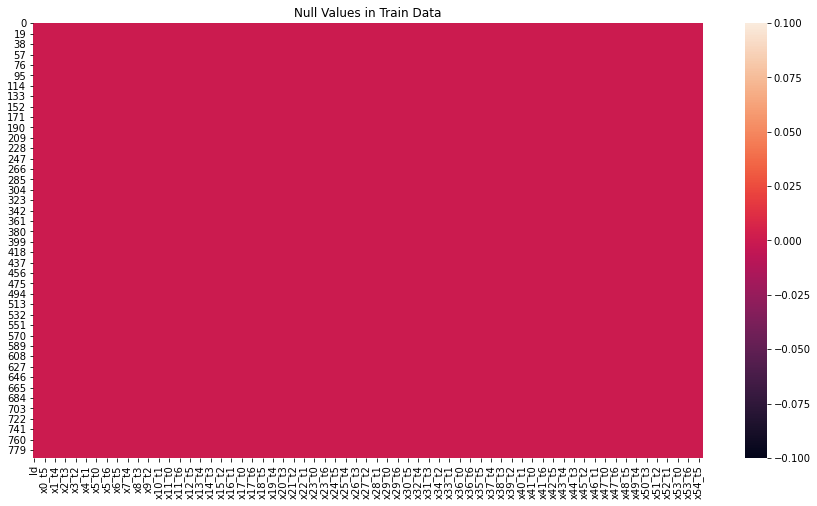

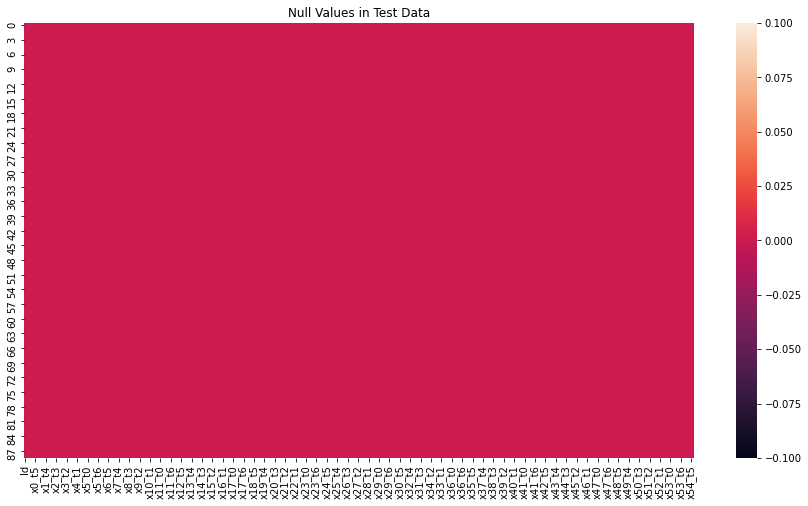

In [6]:
# checking for null values in train data and test data with the help of a heat map
plt.figure(figsize=(15,8))
sns.heatmap(train.isnull())
plt.title('Null Values in Train Data')

plt.figure(figsize=(15,8))
sns.heatmap(test.isnull())
plt.title('Null Values in Test Data')
plt.show()

- There are no missing values in train and test datasets.

### Analysing the target variable 'y2'

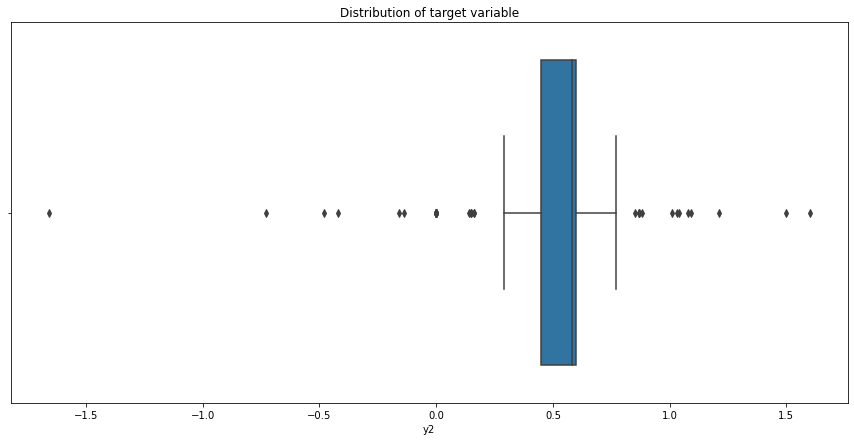

In [7]:
plt.figure(figsize=(15,7))
sns.boxplot(x=train['y2'])
plt.title('Distribution of target variable')
plt.show()

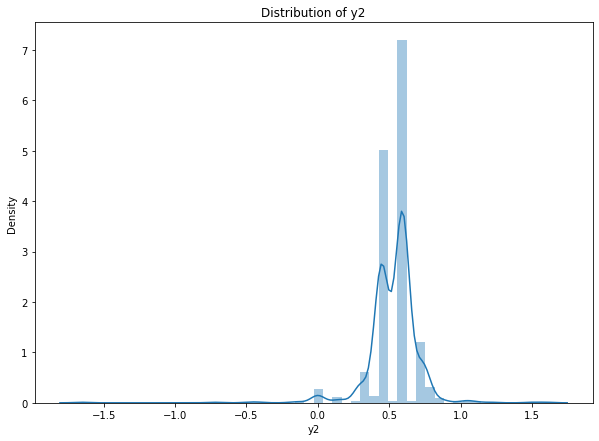

In [8]:
plt.figure(figsize=(10,7))
sns.distplot(train['y2'])
plt.title('Distribution of y2')
plt.show()

In [9]:
train.describe()['y2']

count    794.000000
mean       0.528841
std        0.184369
min       -1.660000
25%        0.450000
50%        0.580000
75%        0.600000
max        1.600000
Name: y2, dtype: float64

**Insights:**
- The range of the target variable y2 is (-1.6, 1.6)
- Most of the data in y2 lies in (0.4, 0.6)


## Analysing the sensor data

In [10]:
train_sensors = train.drop(['Id', 'y2'], axis=1)
test_sensors  = test.drop('Id', axis=1)

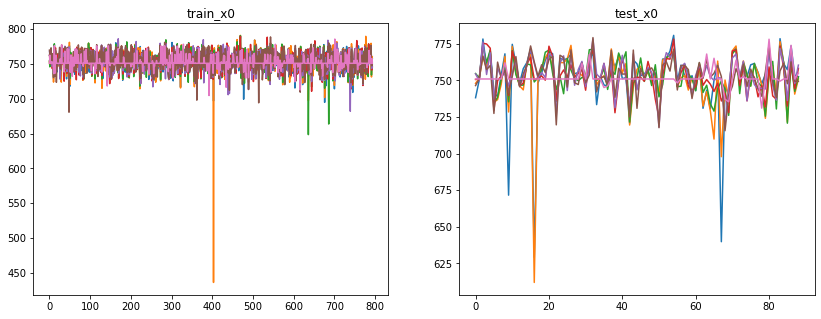

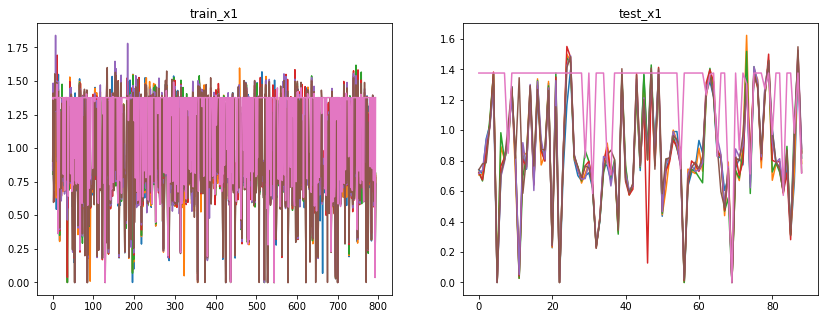

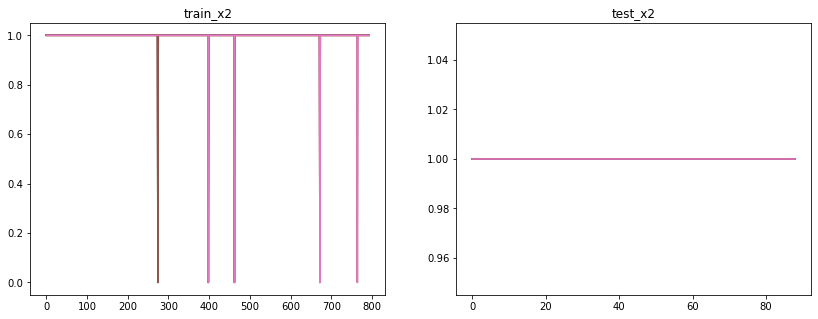

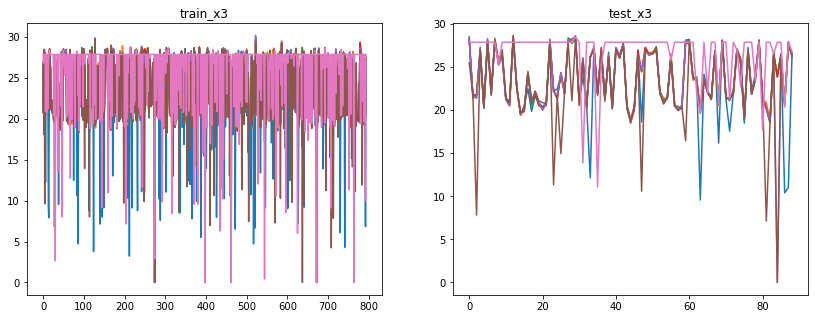

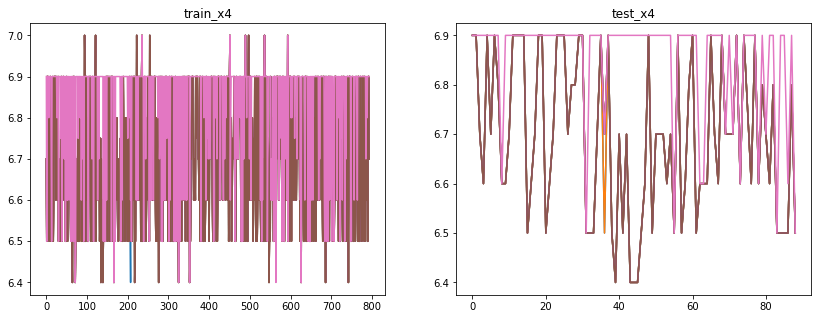

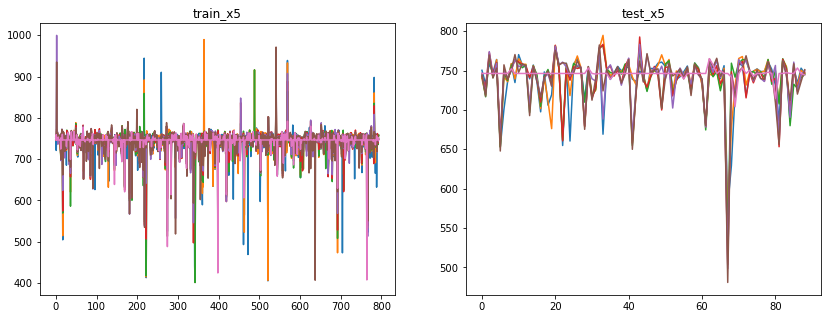

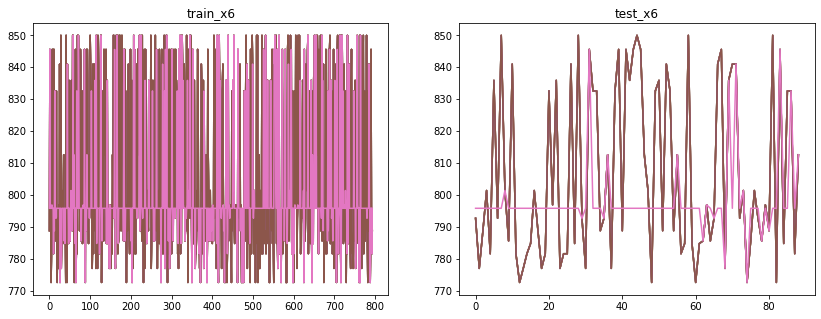

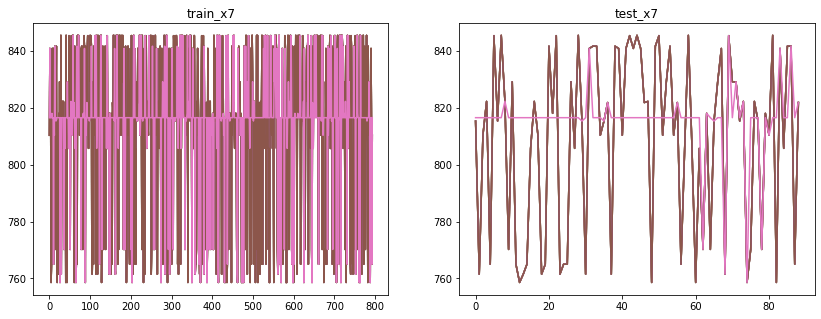

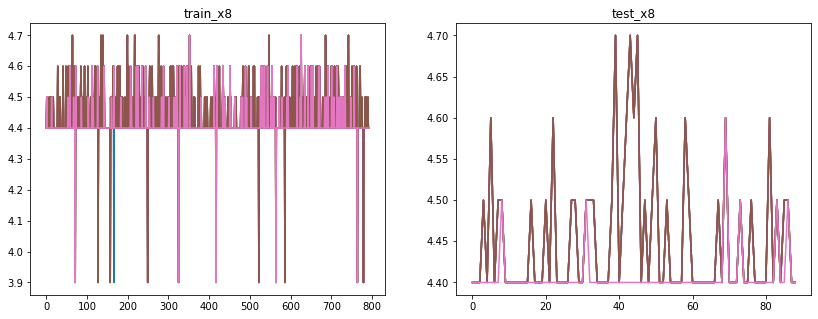

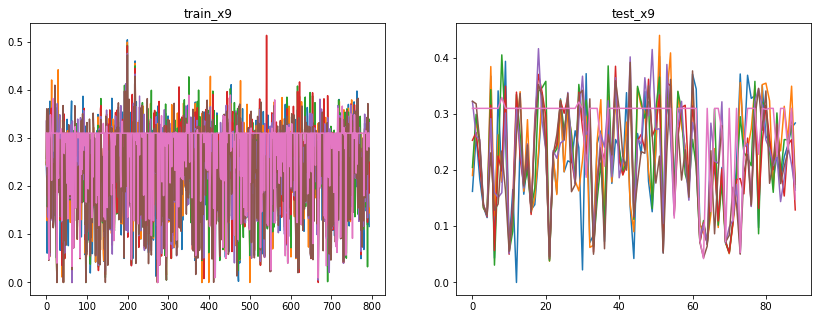

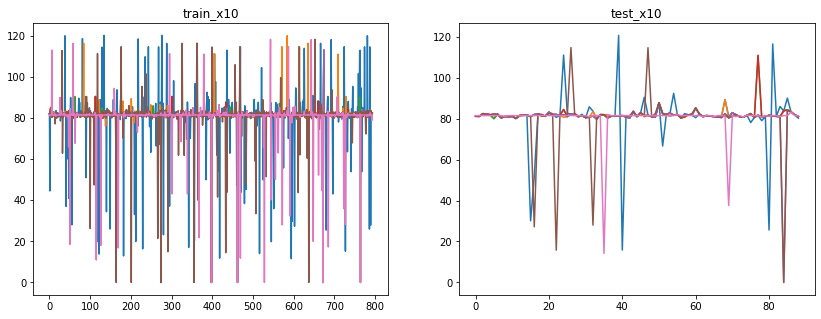

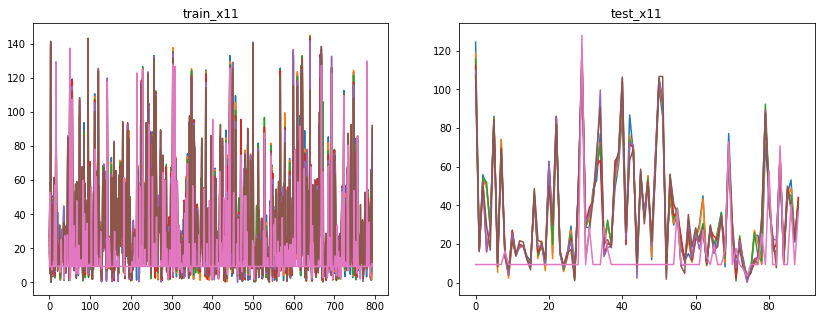

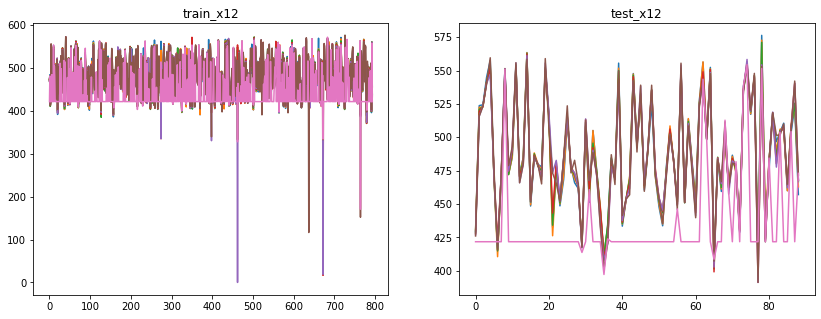

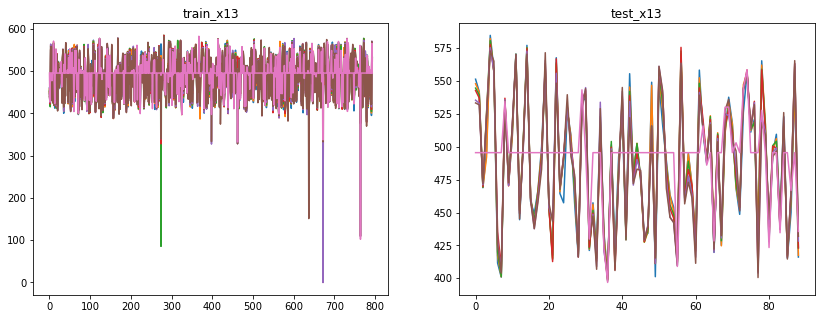

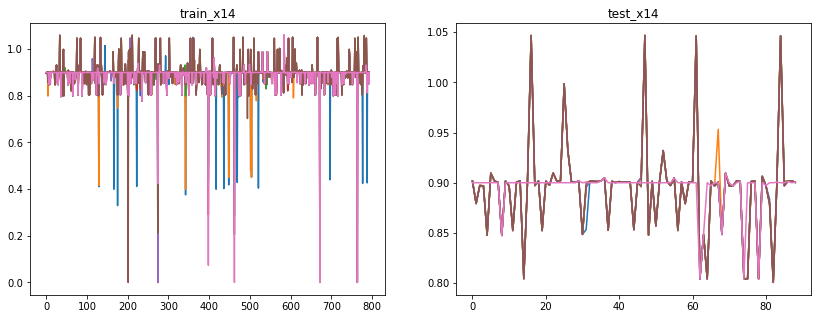

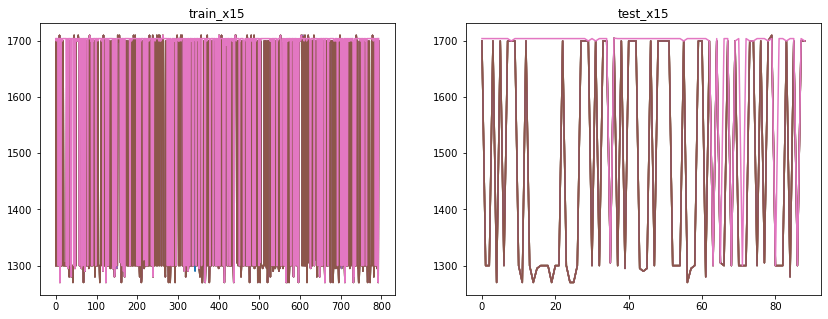

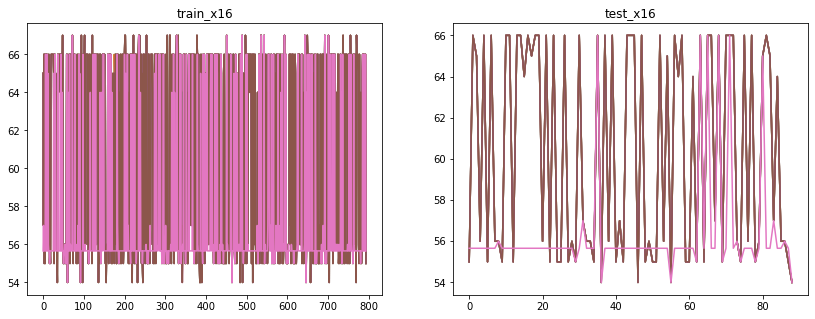

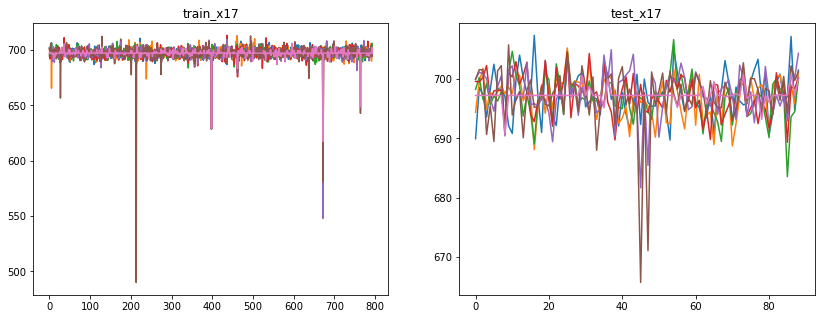

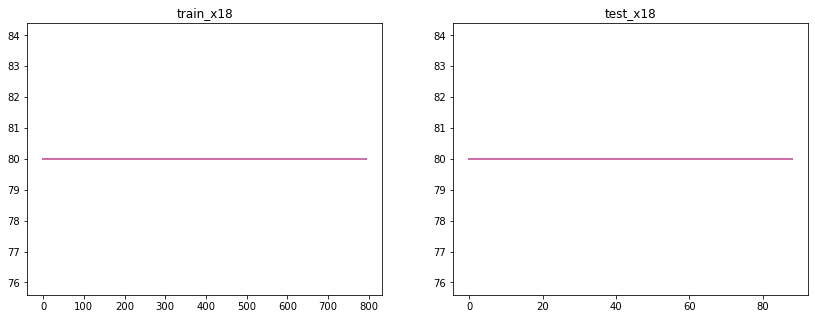

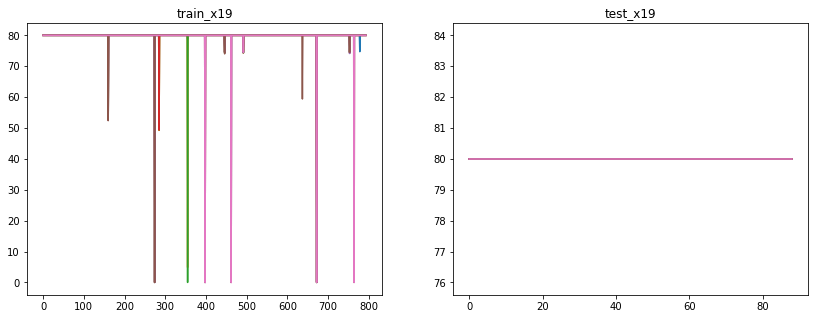

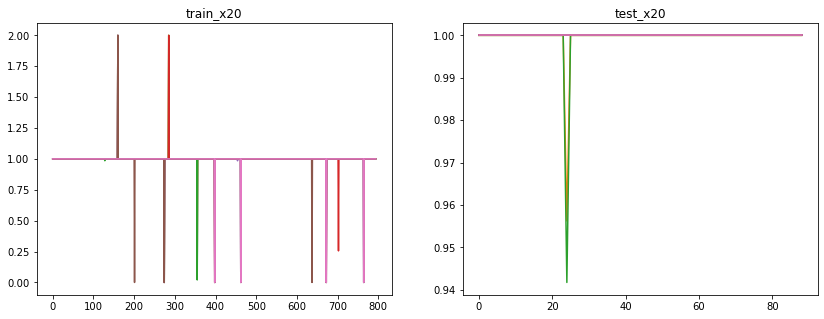

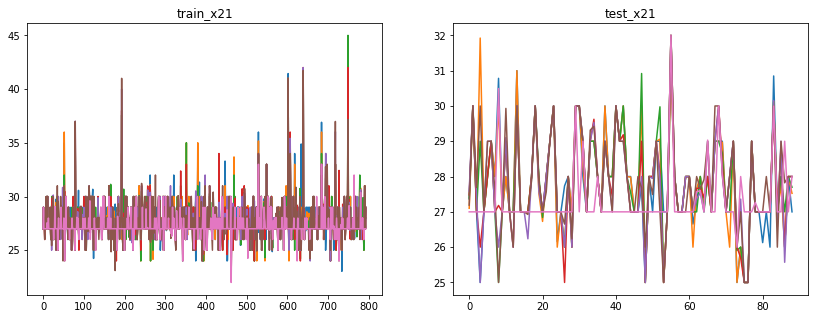

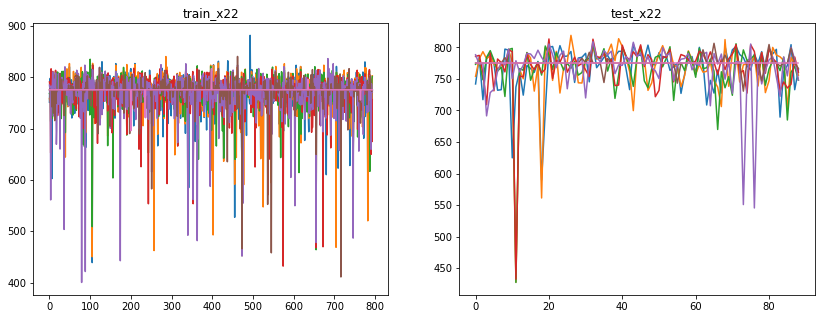

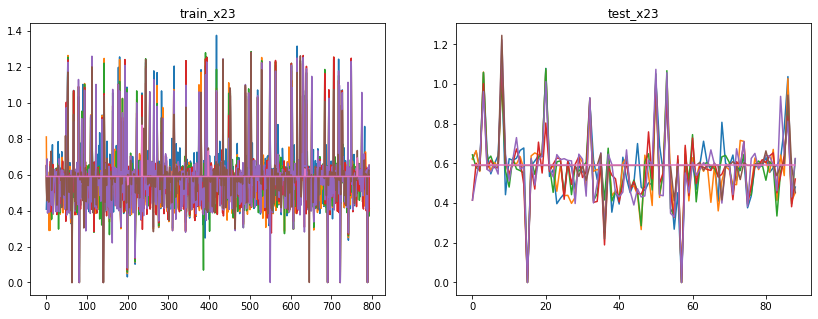

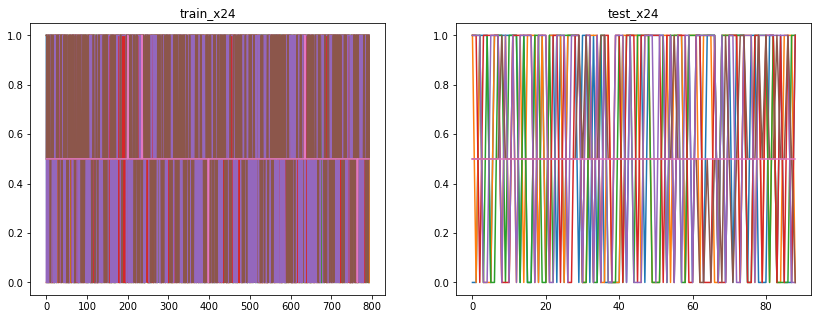

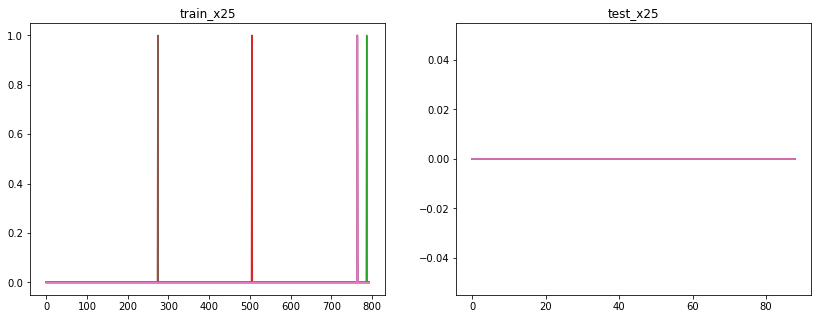

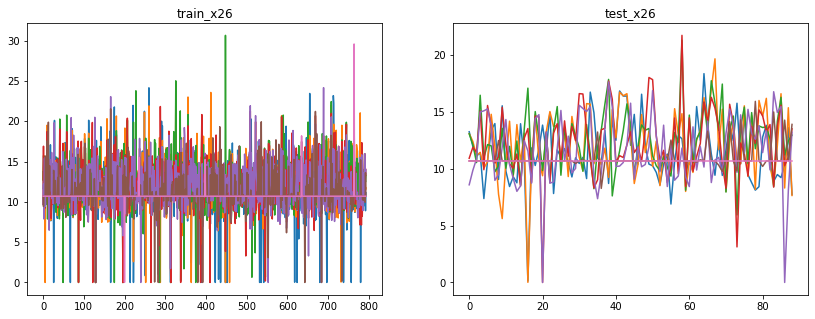

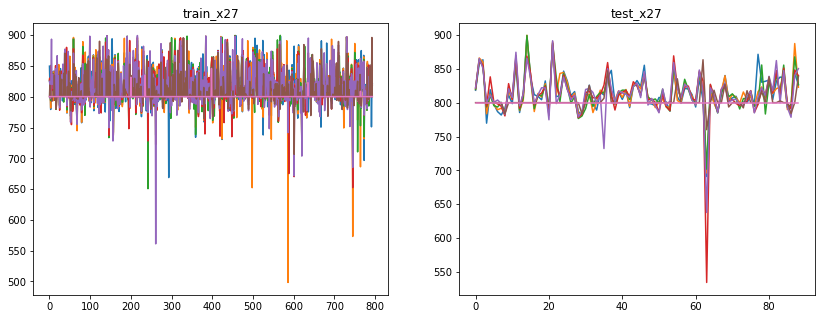

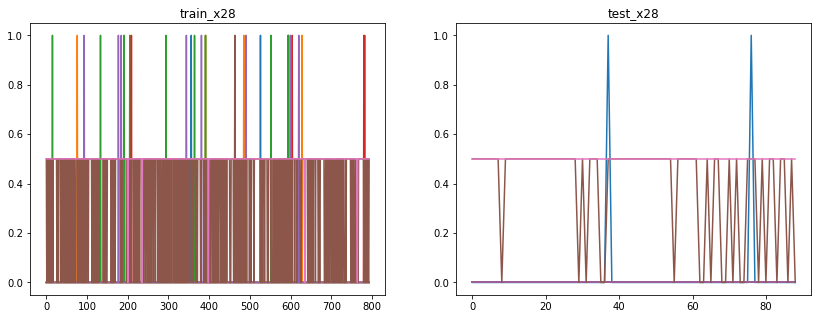

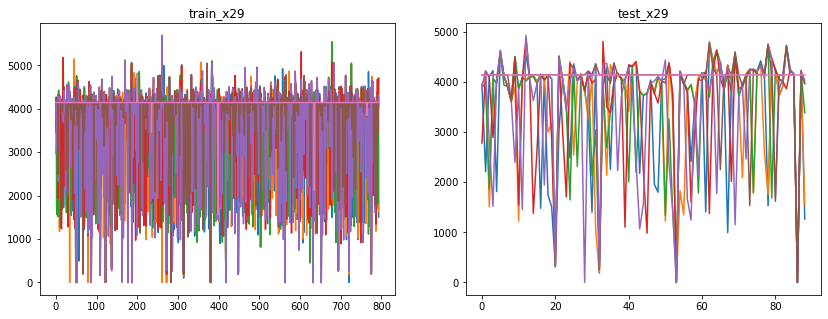

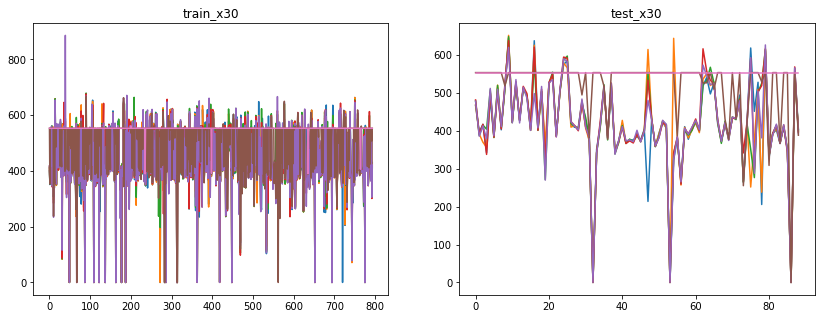

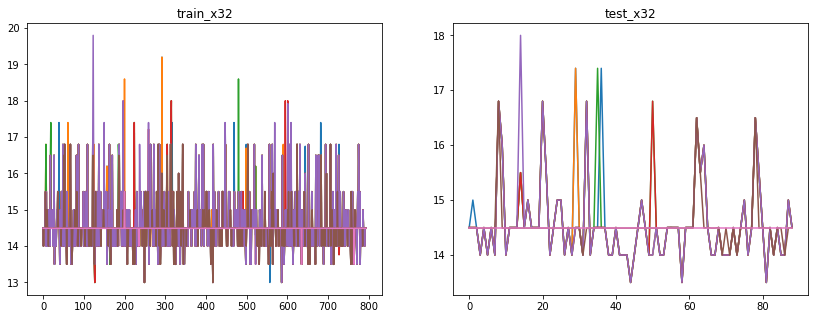

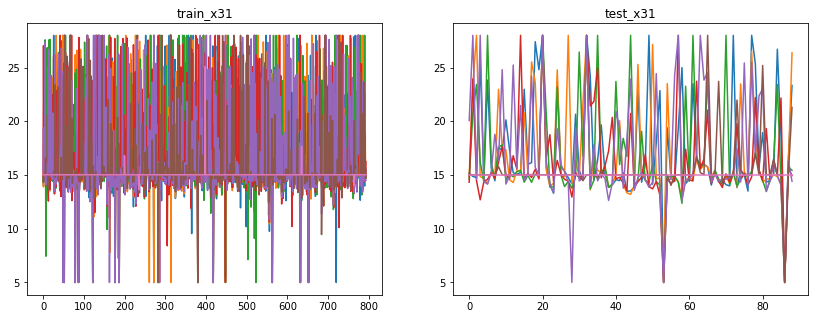

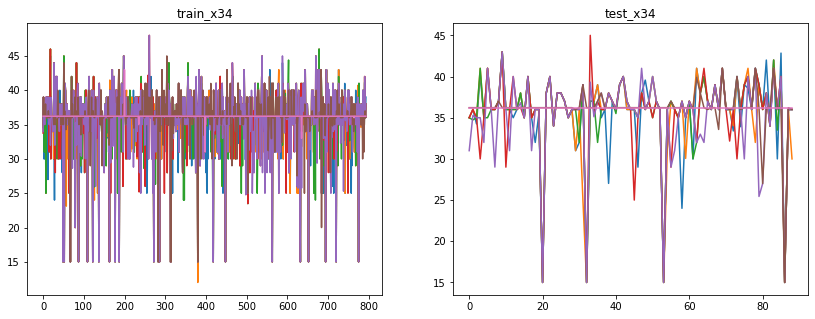

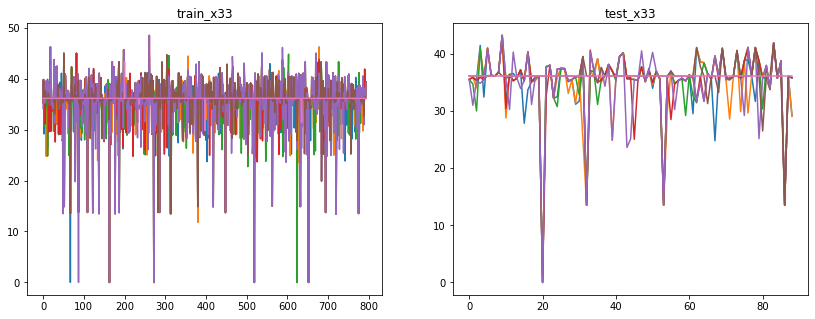

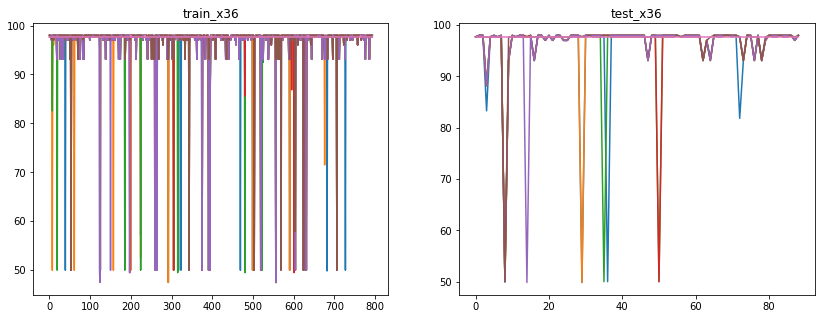

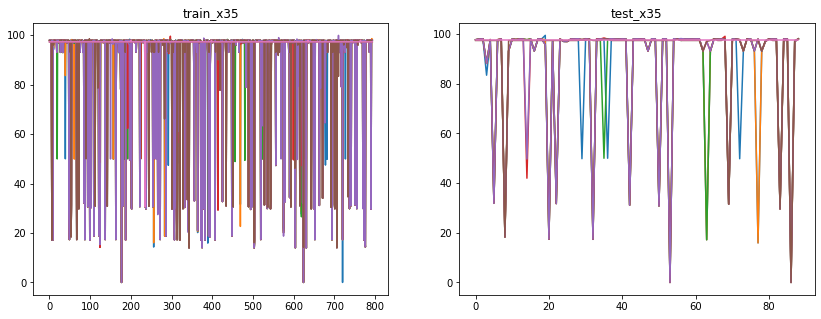

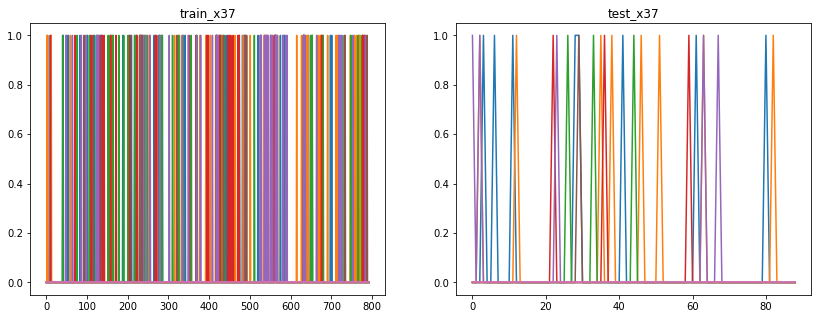

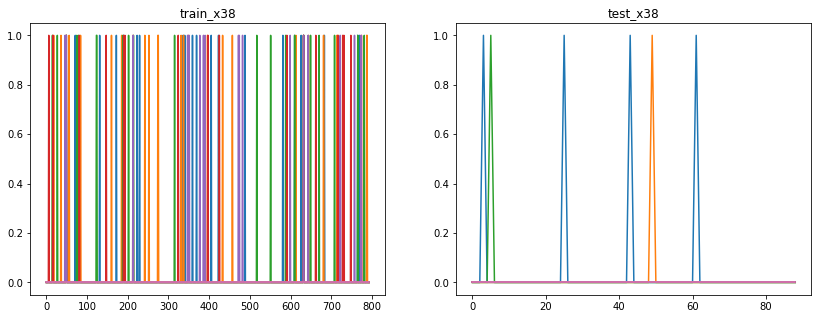

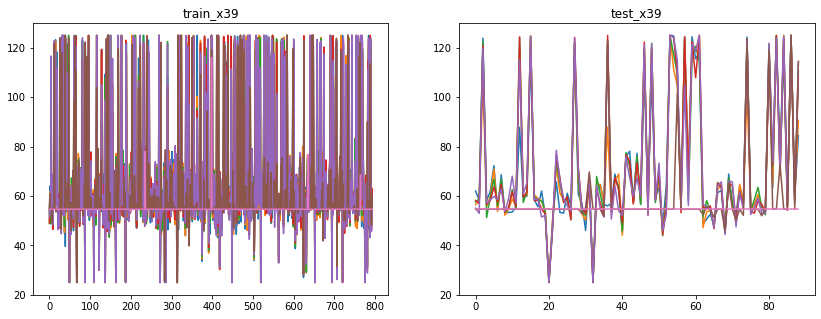

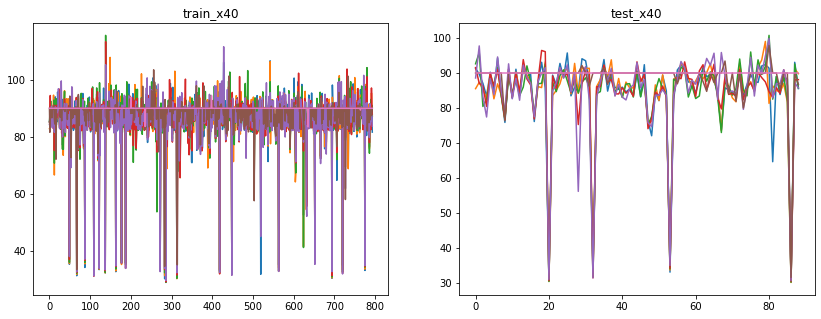

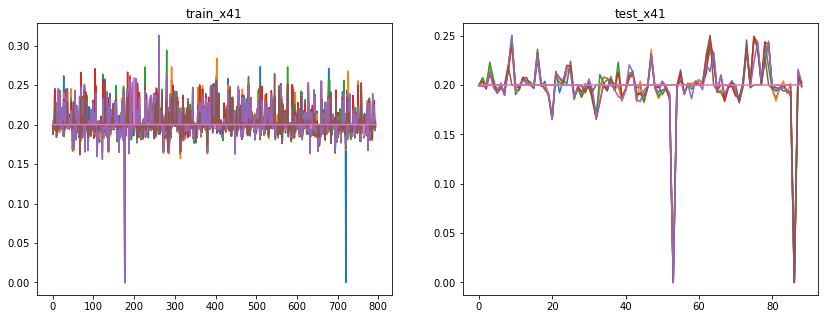

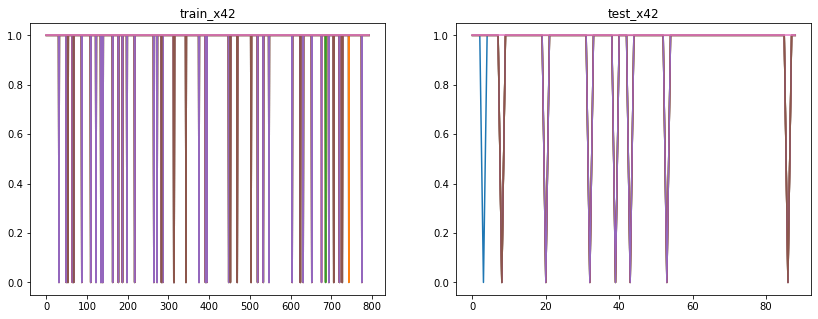

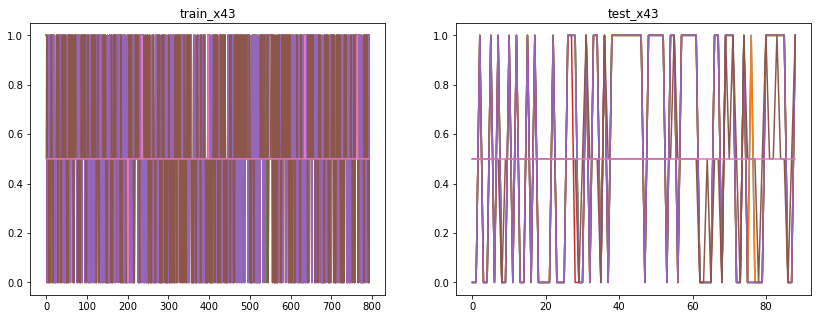

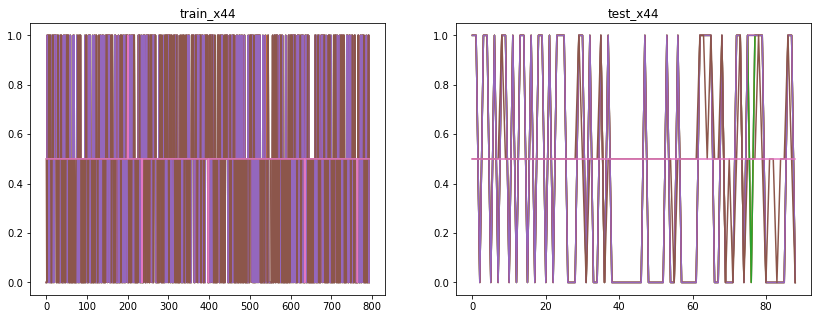

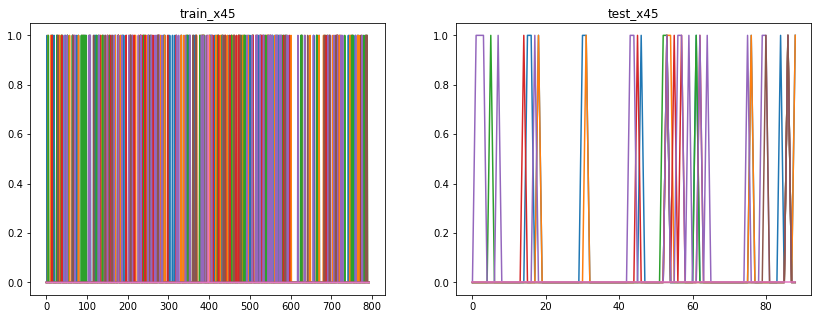

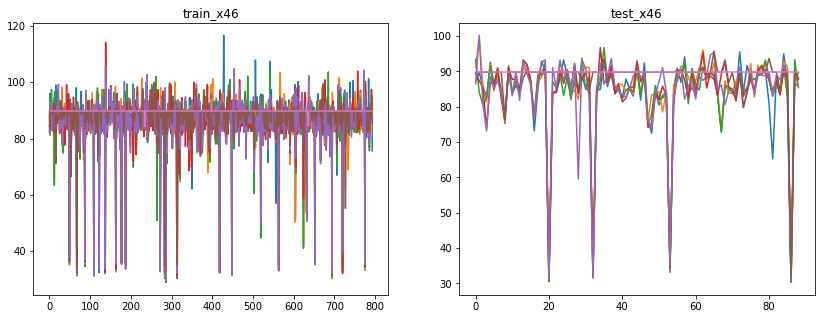

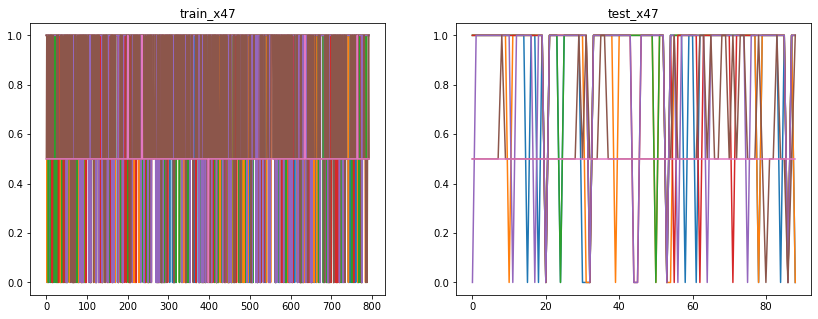

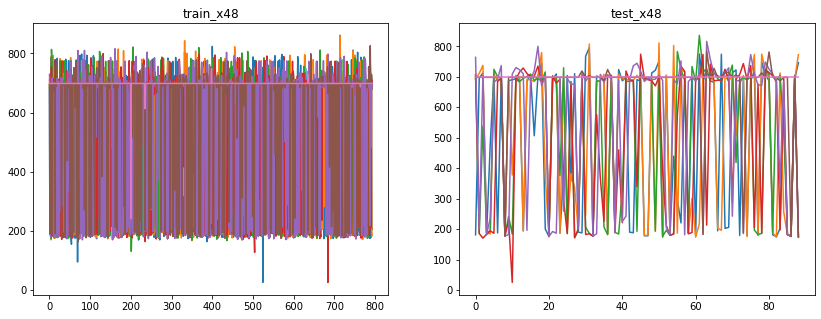

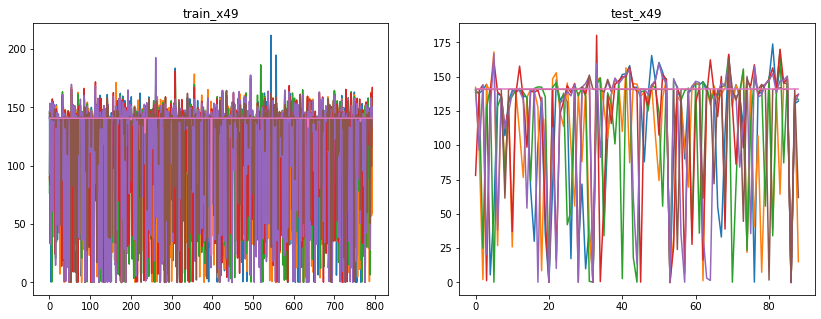

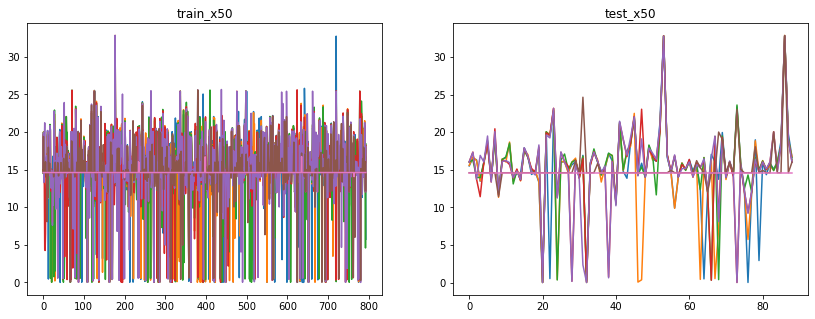

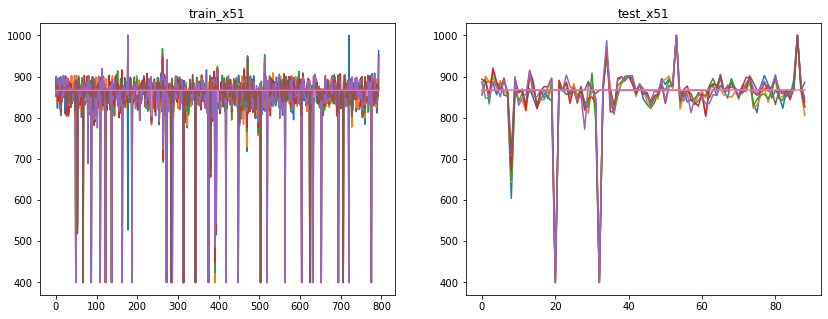

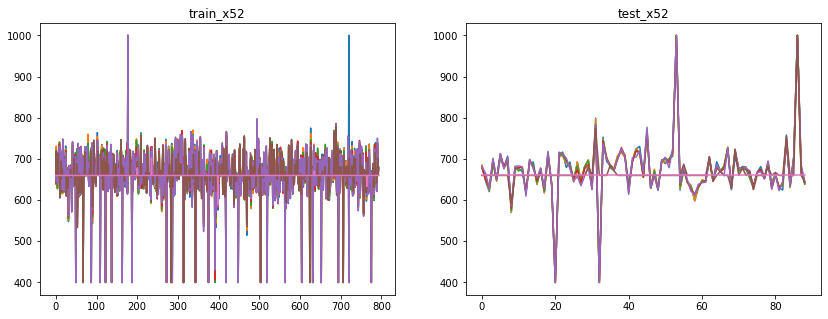

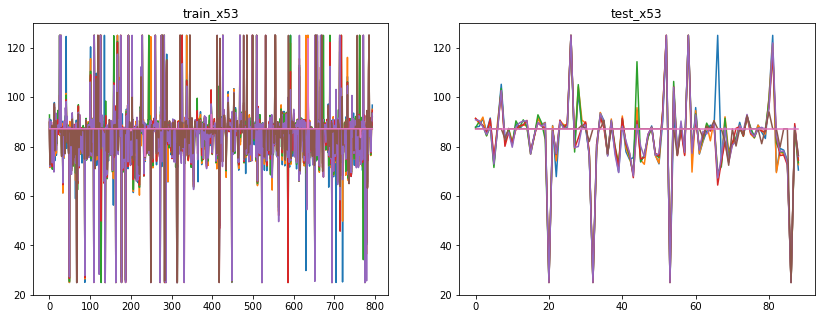

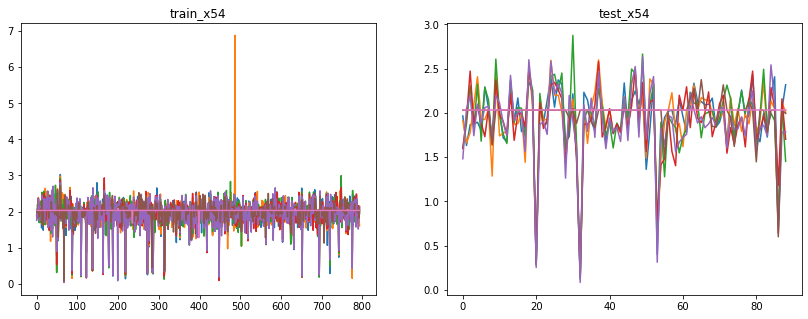

In [11]:
# creating plots for each sensor in train and test data
for i in range(0,len(train_sensors.columns.tolist()),7):
                
                fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
                
                ax1.plot(train_sensors.iloc[:, i:i+7])
                ax1.set_title('train_'+train_sensors.columns.tolist()[i].split('_')[0])
    
                ax2.plot(test_sensors.iloc[:, i:i+7])
                ax2.set_title('test_'+test_sensors.columns.tolist()[i].split('_')[0])
                
                plt.show()

## Feature Engineering

The train and test datasets contain data that represents readings taken of the 55 sensors (x0, x1,..., x54) attached to a machine at 7 different time stamps (t0, t1,..., t6). Using all the 386 features to create any model will lead to overfitting and will most likely result in bad performance of the model. Hence, we have chosen to combined the readings taken at different time stamps for each sensor using mean to reduce the number of features.

In [12]:
#averaging the columns in train data
train_sensors = train.drop(['Id', 'y2'], axis=1)

avg_data = pd.DataFrame()
for  i in range(0, len(train_sensors.columns.tolist()), 7):
     avg_data[train_sensors.columns.tolist()[i].split('_')[0]] = np.mean(train_sensors.iloc[:, i:i+7], axis = 1)
        
train_avg = pd.concat([train['Id'], avg_data, train[['y2']]], axis=1)
train_avg

Id          x0        x1   x2         x3        x4          x5  \
0    706  760.244080  0.937269  1.0  22.056471  6.728571  748.549404   
1    239  757.366380  1.379567  1.0  26.895488  6.500000  749.596987   
2    613  757.052327  0.864291  1.0  22.271551  6.900000  820.260866   
3    588  760.571769  0.808450  1.0  28.319341  6.900000  753.283047   
4    780  768.801759  0.822851  1.0  19.236735  6.814286  760.840050   
..   ...         ...       ...  ...        ...       ...         ...   
789  835  766.069784  0.832278  1.0  21.072290  6.557143  726.338241   
790  192  765.594878  0.691425  1.0  26.742755  6.557143  750.907462   
791  629  745.048053  0.935202  1.0  22.344123  6.900000  742.445135   
792  559  749.796813  0.045067  1.0  17.101026  6.900000  750.949348   
793  684  751.815084  0.862552  1.0  27.493094  6.728571  752.122507   

             x6          x7        x8        x9        x10         x11  \
0    789.804275  811.182847  4.400000  0.269143  81.975911   18.219610   
1    845.599976  840.799988  4.500000  0.279756  76.698810   54.505696   
2    793.147153  815.468561  4.400000  0.209458  82.139933    9.297903   
3    793.147153  815.468561  4.400000  0.181063  81.888624  118.440647   
4    775.918551  766.868551  4.400000  0.290602  82.104374    2.552850   
..          ...         ...       ...       ...        ...         ...   
789  786.375704  807.240010  4.400000  0.154801  75.354972   10.847365   
790  838.489979  837.325704  4.485714  0.339935  80.651500   57.407406   
791  793.147153  815.468561  4.400000  0.250890  82.605479    9.087184   
792  781.599976  765.000000  4.400000  0.245691  80.706435   11.120567   
793  789.804275  811.182847  4.400000  0.223312  82.208071   73.361083   

            x12         x13       x14          x15        x16         x17  \
0    464.311165  458.060138  0.897572  1357.750000  63.665714  699.248160   
1    481.326723  427.410667  0.900295  1700.000000  57.000000  696.463580   
2    413.788298  433.359535  0.901479  1357.750000  64.522857  697.047573   
3    421.961638  547.761377  0.901376  1700.607143  55.094286  700.842542   
4    525.866158  536.969565  0.851040  1357.750000  64.522857  697.671191   
..          ...         ...       ...          ...        ...         ...   
789  441.954687  442.322155  0.900668  1353.464286  62.808571  699.186344   
790  495.492976  450.310229  0.900455  1700.607143  56.808571  699.200358   
791  402.560367  420.497237  0.901476  1362.035714  64.522857  697.727385   
792  559.055154  569.058447  0.852347  1270.000000  66.000000  700.838379   
793  439.712521  524.545623  0.901021  1700.607143  55.094286  698.606585   

      x18   x19  x20        x21         x22       x23       x24  x25  \
0    80.0  80.0  1.0  27.002195  771.923413  0.620713  0.571429  0.0   
1    80.0  80.0  1.0  29.000000  774.974019  0.492991  0.642857  0.0   
2    80.0  80.0  1.0  28.020719  774.704272  0.596236  0.571429  0.0   
3    80.0  80.0  1.0  27.000000  717.249578  0.537579  0.428571  0.0   
4    80.0  80.0  1.0  26.694875  797.721864  0.534037  0.714286  0.0   
..    ...   ...  ...        ...         ...       ...       ...  ...   
789  80.0  80.0  1.0  27.072360  775.604797  0.168571  0.857143  0.0   
790  80.0  80.0  1.0  30.378431  744.058030  0.492162  0.428571  0.0   
791  80.0  80.0  1.0  27.857143  768.304171  0.584384  0.785714  0.0   
792  80.0  80.0  1.0  27.428571  756.066895  0.486410  0.928571  0.0   
793  80.0  80.0  1.0  28.545732  779.356534  0.535517  0.571429  0.0   

           x26         x27       x28          x29         x30        x32  \
0    11.432371  822.512086  0.142857  3875.245378  452.398282  14.497143   
1    12.956240  820.825508  0.071429  4085.155006  382.562997  14.070000   
2    11.748918  802.226723  0.142857  3753.099335  521.043722  14.497143   
3    13.462370  793.734623  0.142857  3711.580815  512.376801  14.497143   
4    12.589026  833.061031  0.142857  3751.611019  456.618927  14.497143   
..    

In [13]:
#averaging the columns in test data
test_sensors = test.drop(['Id'], axis=1)

avg_data = pd.DataFrame()
for  i in range(0, len(test_sensors.columns.tolist()), 7):
     avg_data[test_sensors.columns.tolist()[i].split('_')[0]] = np.mean(test_sensors.iloc[:, i:i+7], axis = 1)
        
test_avg = pd.concat([test['Id'], avg_data], axis=1)
test_avg

Id          x0        x1   x2         x3        x4          x5  \
0   584  749.029273  0.818153  1.0  27.853636  6.900000  744.981491   
1   678  750.867913  0.807652  1.0  22.574179  6.900000  725.922392   
2   728  769.521485  0.938685  1.0  20.561553  6.728571  765.828892   
3   338  759.605706  1.087889  1.0  27.140619  6.642857  743.527544   
4   570  766.018495  1.351604  1.0  21.407235  6.900000  758.086469   
..  ...         ...       ...  ...        ...       ...         ...   
84  808  759.598089  0.900658  1.0  17.664977  6.557143  700.721154   
85  283  738.121693  0.466069  1.0  26.584756  6.557143  751.944284   
86  319  767.592468  0.884642  1.0  19.198374  6.514286  730.429511   
87  521  747.029962  1.478471  1.0  25.322219  6.814286  745.261299   
88  875  754.078935  0.803497  1.0  26.517943  6.500000  747.170912   

            x6          x7        x8        x9        x10        x11  \
0   793.147153  815.468561  4.400000  0.252244  81.252118  99.569118   
1   779.690000  769.354286  4.400000  0.286712  81.139397  15.989649   
2   789.804275  811.182847  4.400000  0.241413  82.290412  46.850754   
3   800.604307  821.382868  4.485714  0.160642  82.159567  31.671886   
4   783.632836  772.354286  4.400000  0.146330  81.797886  24.339917   
..         ...         ...       ...       ...        ...        ...   
84  786.375704  807.240010  4.400000  0.205015  59.518799  11.674601   
85  827.347122  838.011408  4.485714  0.235529  84.654960  41.679432   
86  832.599976  841.599976  4.500000  0.244218  83.274769  43.516564   
87  783.632836  772.354286  4.400000  0.283091  81.812571  20.127173   
88  812.599976  821.799988  4.400000  0.178559  80.977754  41.062013   

           x12         x13       x14          x15        x16         x17  \
0   427.259148  535.860383  0.901512  1700.607143  55.094286  697.064879   
1   505.649731  531.501220  0.882229  1357.750000  64.522857  699.690641   
2   508.809270  473.692904  0.897654  1357.750000  63.665714  699.386363   
3   524.446410  511.683073  0.897277  1700.607143  55.951429  696.859041   
4   534.882910  567.042758  0.855210  1332.035714  64.522857  696.790998   
..         ...         ...       ...          ...        ...         ...   
84  495.863991  516.522288  1.025468  1340.607143  62.808571  697.951436   
85  456.695841  427.491889  0.899284  1700.607143  55.951429  692.605262   
86  505.673331  462.329831  0.901410  1300.000000  56.000000  700.515390   
87  516.842167  548.844684  0.901634  1700.607143  55.094286  697.238721   
88  466.683500  425.096841  0.900356  1700.000000  54.000000  701.205401   

     x18   x19  x20        x21         x22       x23       x24  x25  \
0   80.0  80.0  1.0  27.301821  770.644735  0.556965  0.714286  0.0   
1   80.0  80.0  1.0  29.571429  779.596059  0.602103  0.571429  0.0   
2   80.0  80.0  1.0  27.175720  763.553285  0.580660  0.714286  0.0   
3   80.0  80.0  1.0  27.703395  757.115718  0.903090  0.428571  0.0   
4   80.0  80.0  1.0  27.000000  777.576342  0.599877  0.571429  0.0   
..   ...   ...  ...        ...         ...       ...       ...  ...   
84  80.0  80.0  1.0  26.796533  772.375248  0.640164  0.571429  0.0   
85  80.0  80.0  1.0  28.226386  742.906801  0.628472  0.428571  0.0   
86  80.0  80.0  1.0  26.770619  780.834093  0.876568  0.642857  0.0   
87  80.0  80.0  1.0  27.857143  770.374421  0.461359  0.428571  0.0   
88  80.0  80.0  1.0  27.745921  760.027042  0.534953  0.500000  0.0   

          x26         x27       x28          x29         x30        x32  \
0   11.483666  814.817778  0.142857  3823.583507  496.864468  14.497143   
1   11.383379  845.352453  0.142857  3862.545787  437.037392  14.568571   
2   10.944467  840.863981  0.142857  3238.937461  448.211463  14.497143   
3   12.979212  792.010747  0.142857  3581.971601  417.964923  14.140000   
4   10.694104  813.360817  0.142857  3733.430173  516.069855  14.497143   
..        ...         ...       ...          ...         ...        ...

## Visualizing the new features of train and test data simultaneously

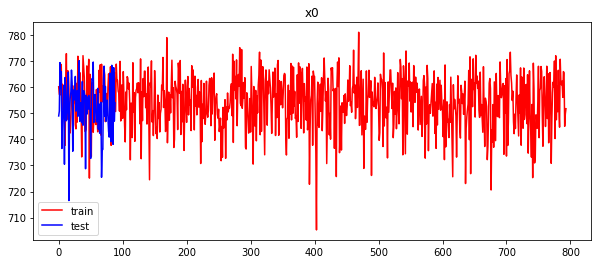

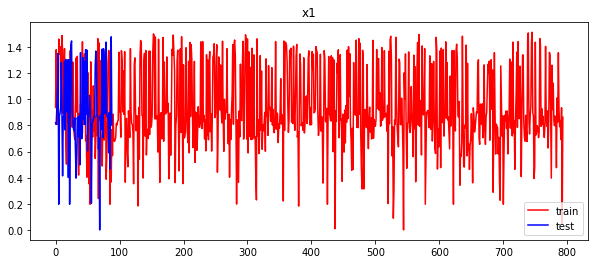

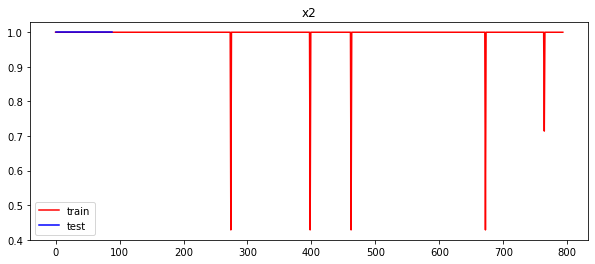

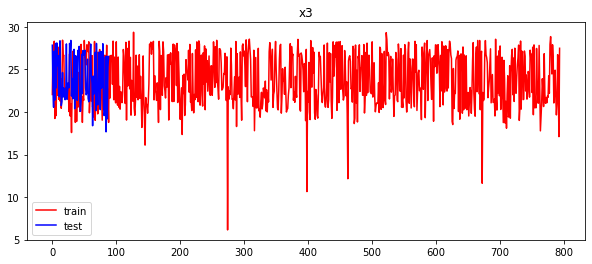

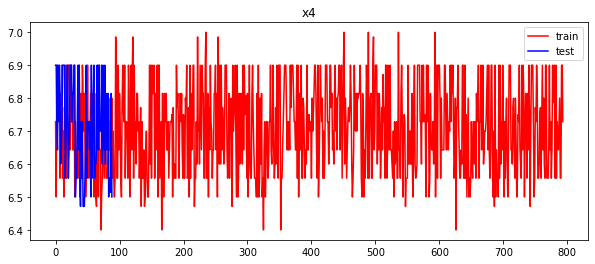

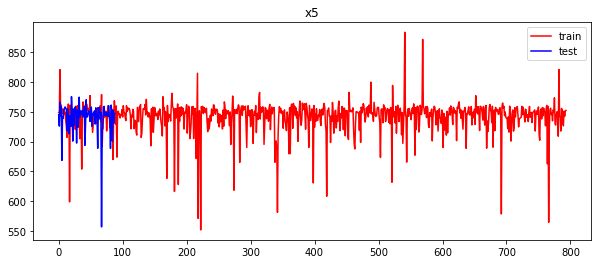

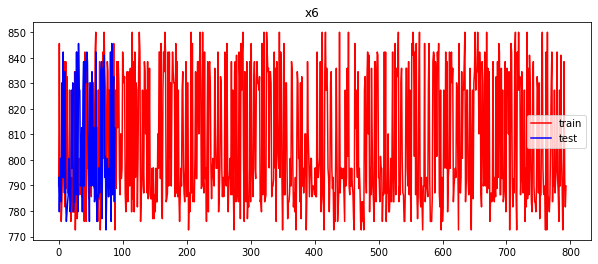

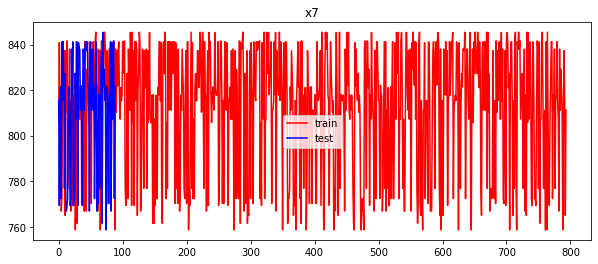

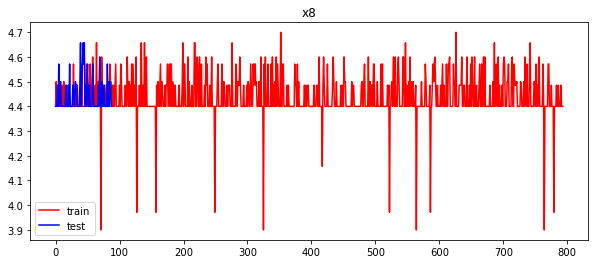

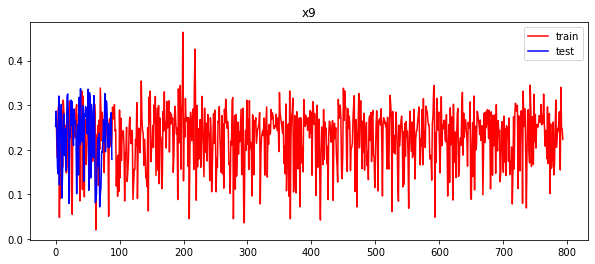

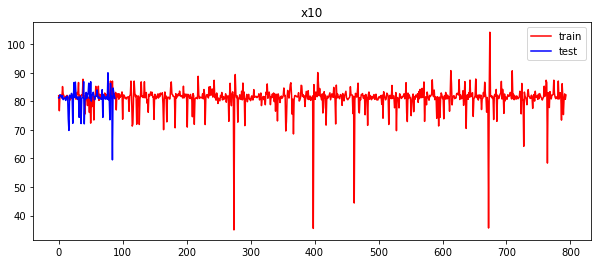

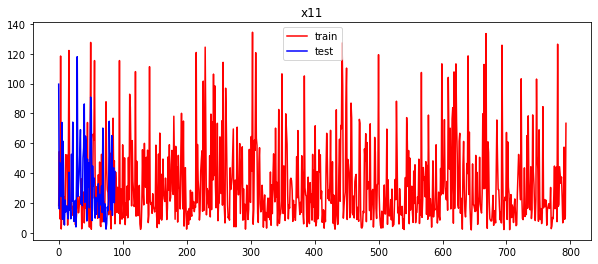

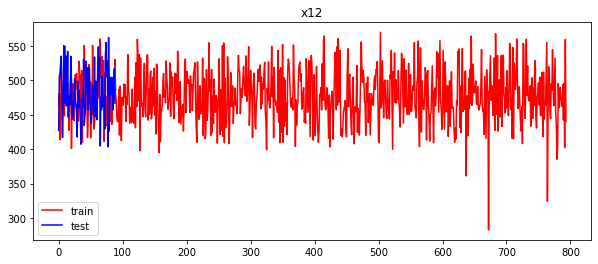

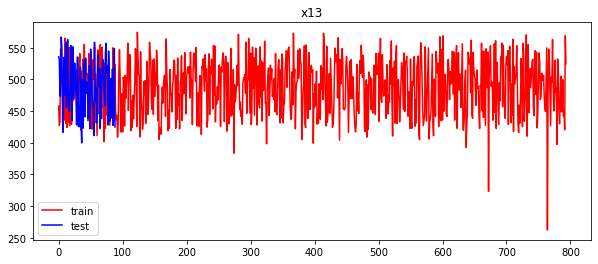

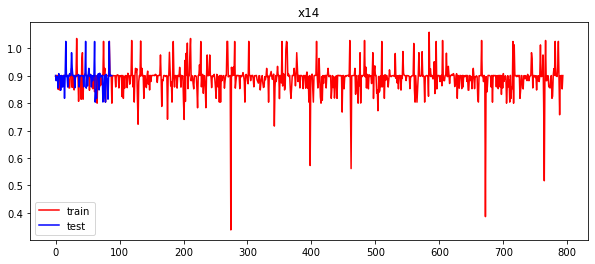

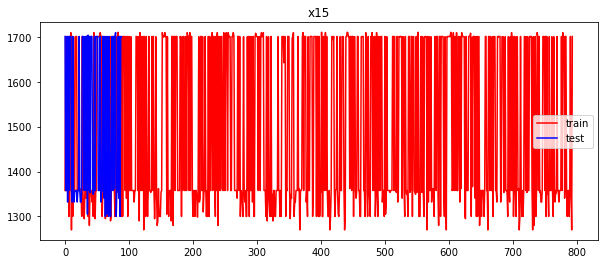

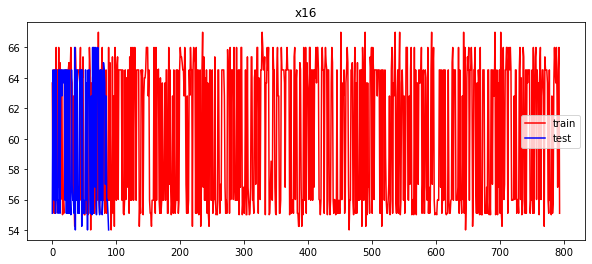

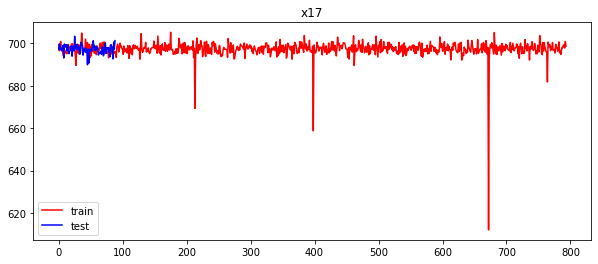

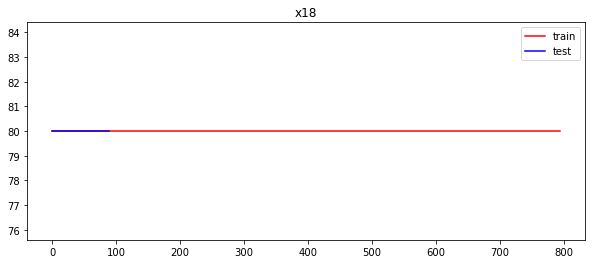

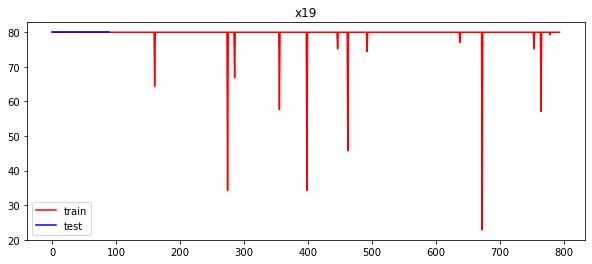

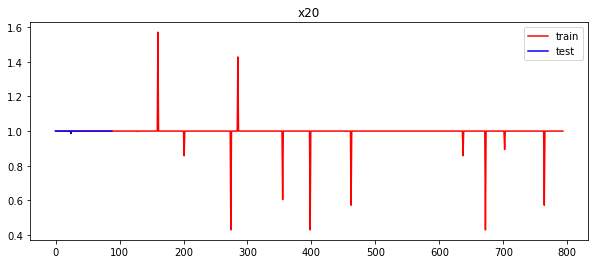

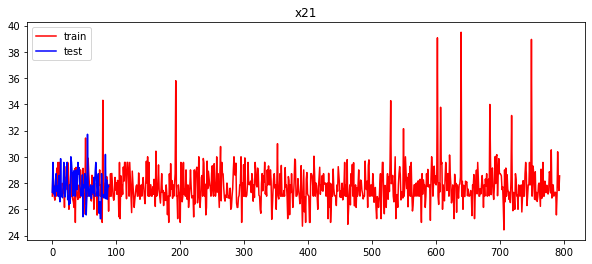

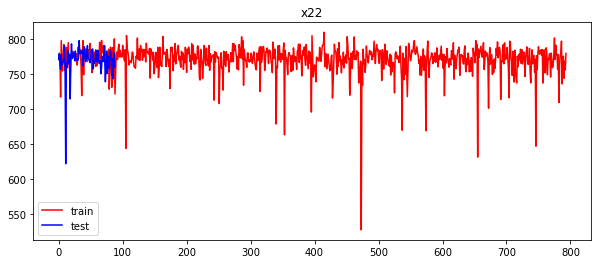

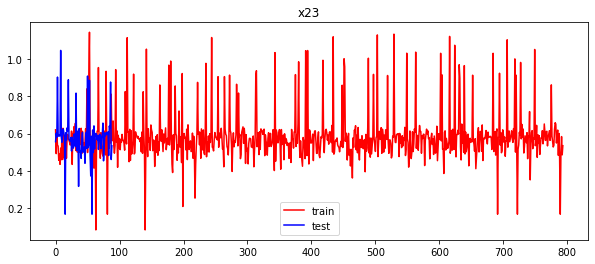

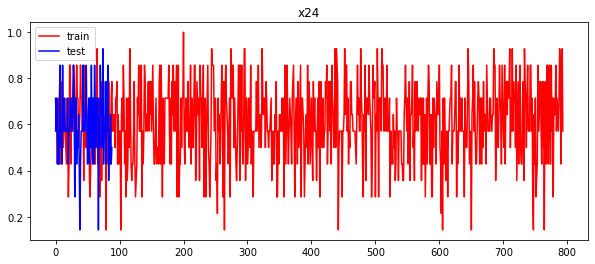

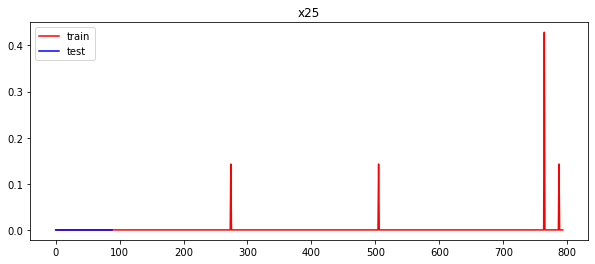

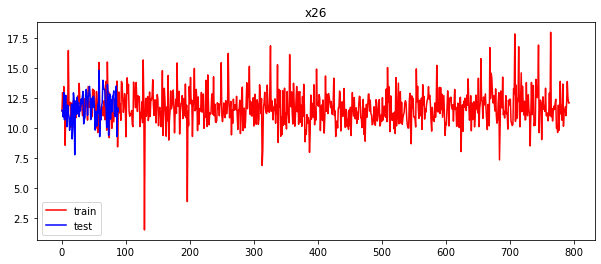

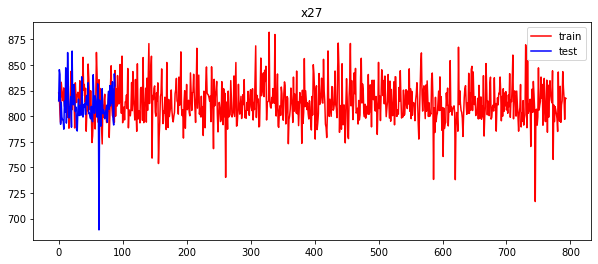

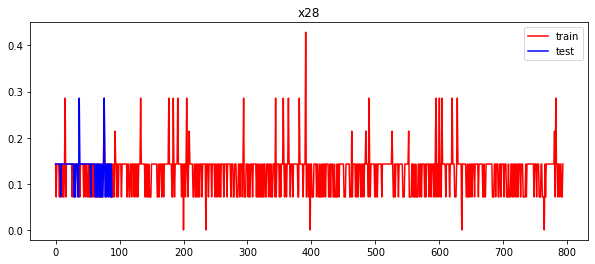

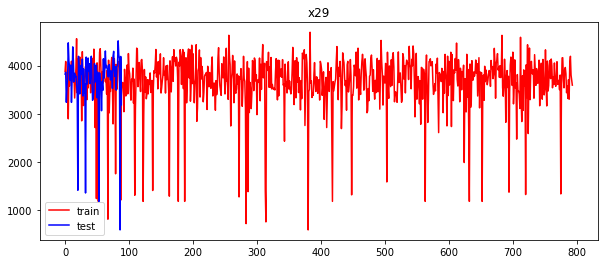

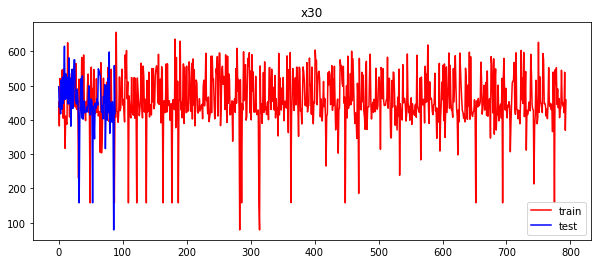

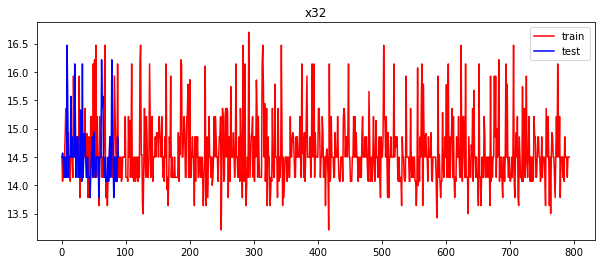

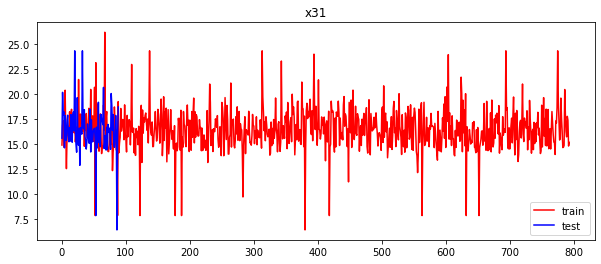

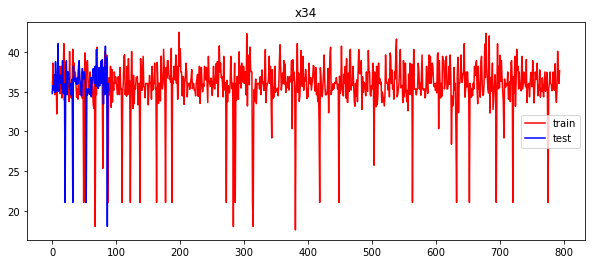

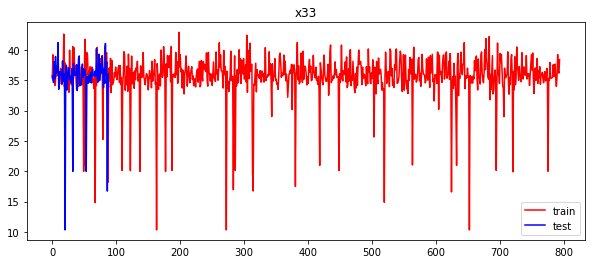

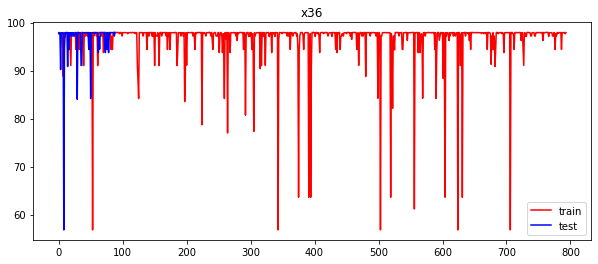

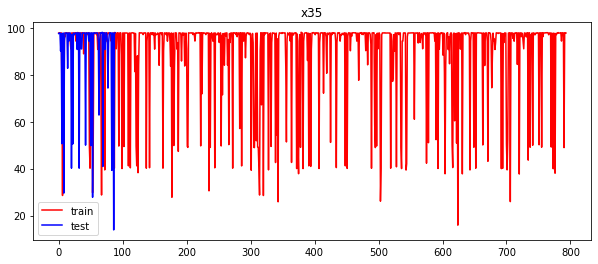

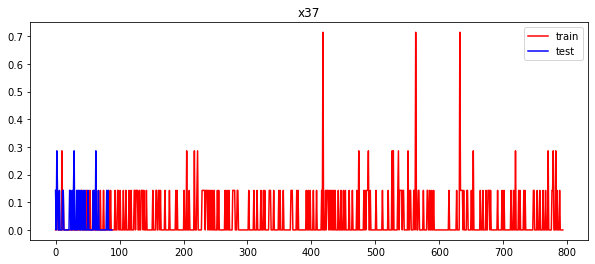

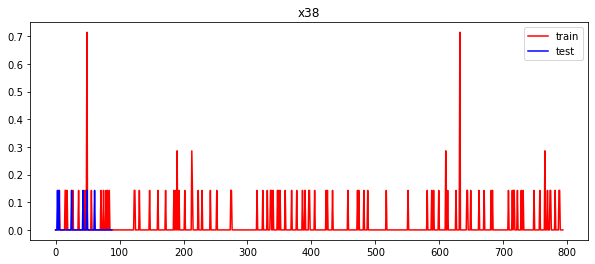

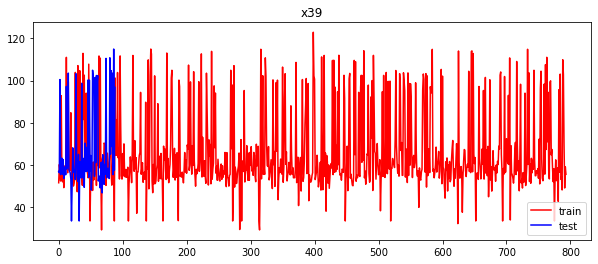

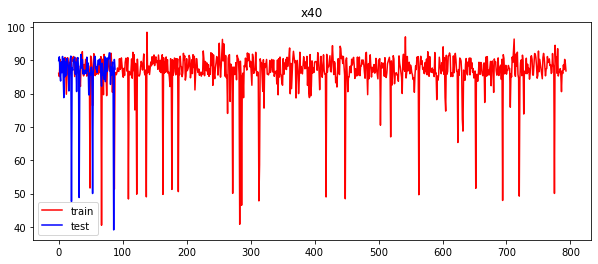

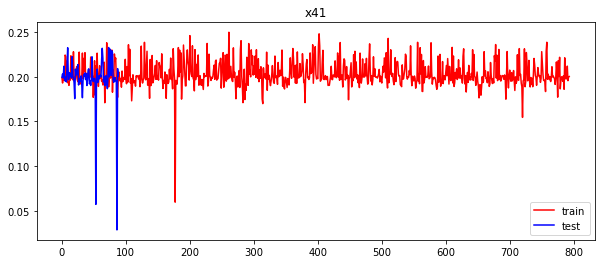

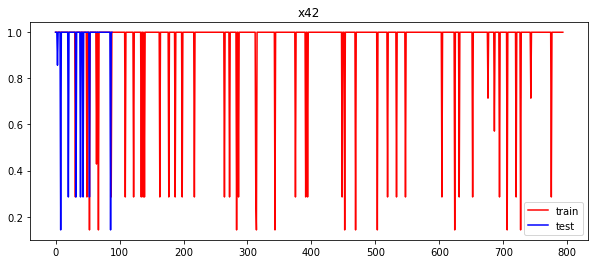

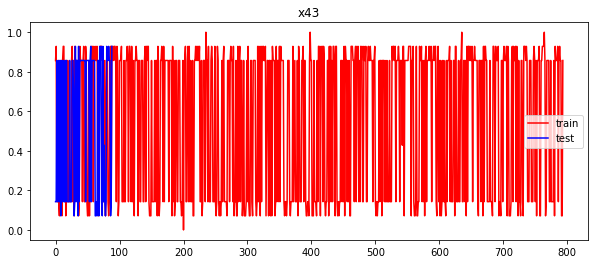

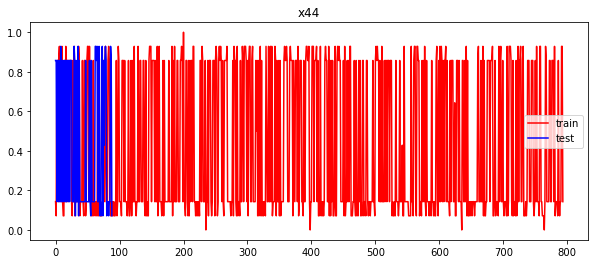

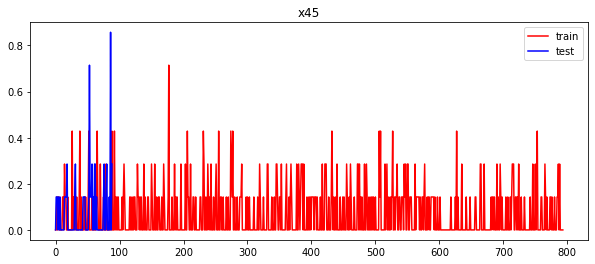

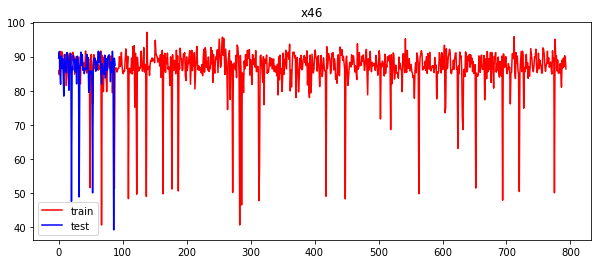

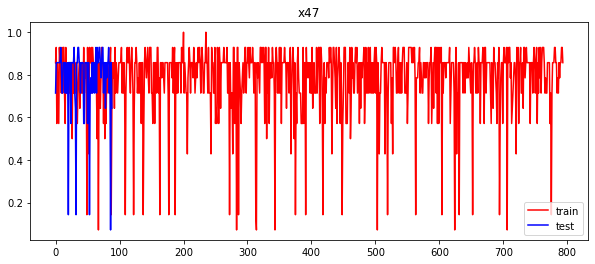

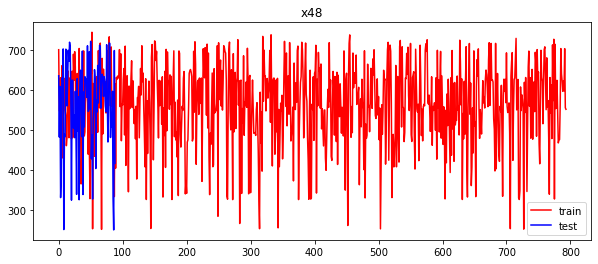

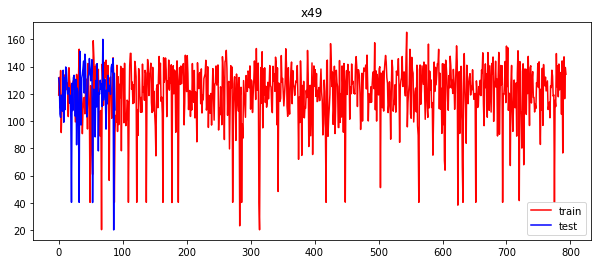

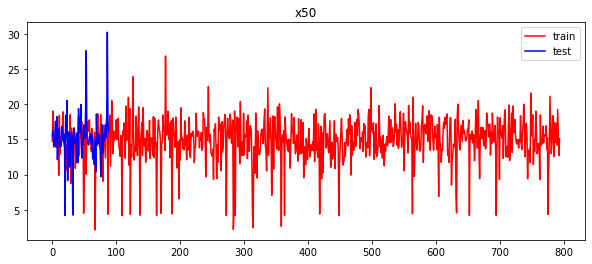

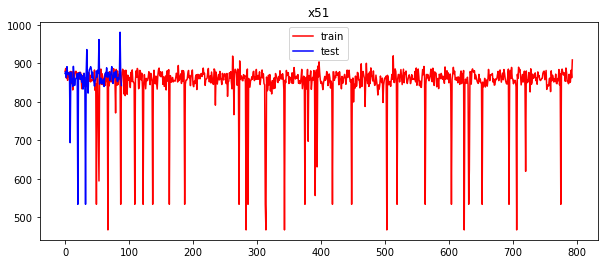

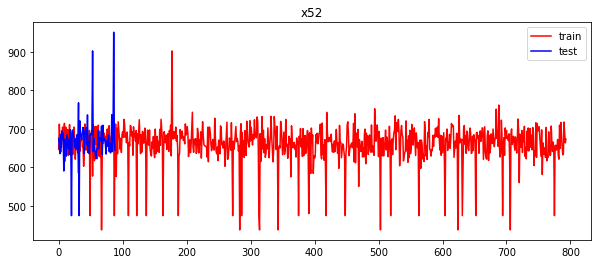

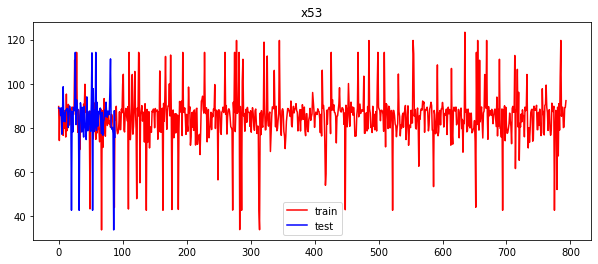

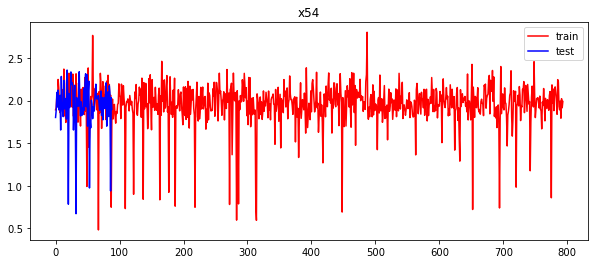

In [14]:
for col in train_avg.drop(['Id', 'y2'], axis=1).columns.to_list():
    
    plt.figure(figsize=(10,4))
    train_avg[col].plot(color='red', label='train')
    test_avg[col].plot(color='blue', label='test')
    plt.title(col)
    plt.legend()
    plt.show()

## Correlation

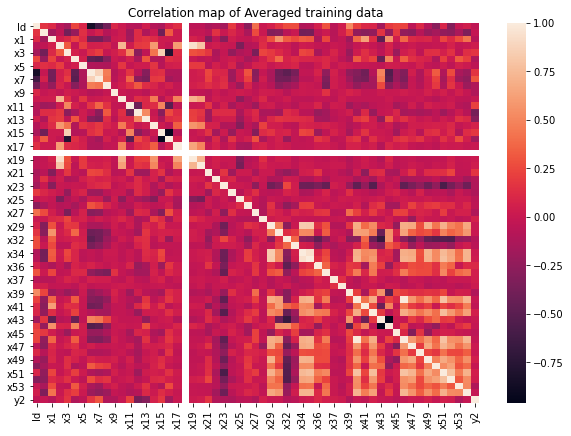

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(train_avg.corr())
plt.title('Correlation map of Averaged training data')
plt.show()

## Hypothesis testing

#### Test 1: To check if the distribution of y2 is normal or not
We perform the Shapiro-Wilk test for normality.
The hypothesis are as follows:
- H0: y2 is a Normally distributed variable.
- H1: y2 is not a Normally distributed variable.

In [16]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import shapiro

stat, p = shapiro(train['y2'])

print('Result of the shapiro test for normality:')
print('='*50)
print('Test statistic = %.3f, p-value = %.3f' % (stat, p))

if p < 0.05:
    print('Null Hypothesis Rejected, y2 is not normally distributed.')
else:
    print('Null Hypothesis accepted, y2 is normally distributed')

Result of the shapiro test for normality:
Test statistic = 0.729, p-value = 0.000
Null Hypothesis Rejected, y2 is not normally distributed.



#### Test 2: To check which features are correlated with target feature y2
Using the Spearman's rank-order test to see which features have a correlation or dependency with y2.
The Hypothesis are as follows:
- H0: the two samples are independent/uncorrelated.
- H1: there is a dependency/correlation between the two samples.

In [17]:
from scipy.stats import spearmanr
dep_cols = []
print("Result of the Spearman's r test:")
print('='*50)
for col in train_avg.drop('y2', axis=1).columns:
    print(col)
    corr, p = spearmanr(train_avg[col],train_avg['y2'])
    print('Correlation coeffeicient = %.3f, p-value = %.3f' % (corr, p))
    if (p > 0.05):
        print(col, 'is uncorrelated with y2.')
    else:
        dep_cols.append(col)
        print(col, 'is correlated with y2.')
    print('-'*50)    

Result of the Spearman's r test:
Id
Correlation coeffeicient = -0.055, p-value = 0.121
Id is uncorrelated with y2.
--------------------------------------------------
x0
Correlation coeffeicient = 0.006, p-value = 0.875
x0 is uncorrelated with y2.
--------------------------------------------------
x1
Correlation coeffeicient = -0.167, p-value = 0.000
x1 is correlated with y2.
--------------------------------------------------
x2
Correlation coeffeicient = 0.006, p-value = 0.876
x2 is uncorrelated with y2.
--------------------------------------------------
x3
Correlation coeffeicient = 0.194, p-value = 0.000
x3 is correlated with y2.
--------------------------------------------------
x4
Correlation coeffeicient = -0.199, p-value = 0.000
x4 is correlated with y2.
--------------------------------------------------
x5
Correlation coeffeicient = -0.116, p-value = 0.001
x5 is correlated with y2.
--------------------------------------------------
x6
Correlation coeffeicient = 0.335, p-value = 

#### Test 3: To check whether the features of the train and test datasets come from the same population.

Using the 2 sample Kolmogorov-Smirnov test on all the features to see whether they follow the same distribution or not.
The hypothesis are as follows:
- H0: The two samples follow the same distribution.
- H1: The two samples donot follow the same distribution.

In [18]:
from scipy.stats import ks_2samp
print('Result of the 2 sample Kolmogorov-Smirnov test:')
print('='*60)
for col in train_avg.drop('y2', axis=1).columns:
    print(col)
    stat, p = ks_2samp(train_avg[col], test_avg[col])
    print('Test statistic = %.3f, p-value = %.3f' % (stat, p))

    if p < 0.05:
        print(col, 'does not follow the same distribution in train and test.')
    else:
        print(col, 'follows the same distribution in train and test.')
        
    print('-'*60)

Result of the 2 sample Kolmogorov-Smirnov test:
Id
Test statistic = 0.097, p-value = 0.414
Id follows the same distribution in train and test.
------------------------------------------------------------
x0
Test statistic = 0.112, p-value = 0.251
x0 follows the same distribution in train and test.
------------------------------------------------------------
x1
Test statistic = 0.082, p-value = 0.617
x1 follows the same distribution in train and test.
------------------------------------------------------------
x2
Test statistic = 0.006, p-value = 1.000
x2 follows the same distribution in train and test.
------------------------------------------------------------
x3
Test statistic = 0.080, p-value = 0.659
x3 follows the same distribution in train and test.
------------------------------------------------------------
x4
Test statistic = 0.079, p-value = 0.662
x4 follows the same distribution in train and test.
------------------------------------------------------------
x5
Test statisti

## Checking for Covariance shift

In [19]:
# creating a new feature origin
train_avg['origin'] = 0
test_avg['origin'] = 1

In [20]:
train_avg.shape

(794, 58)

In [21]:
test_avg.shape

(89, 57)

In [22]:
# upsampling the test data
test_avg1 = resample(test_avg,replace=True,n_samples=train_avg.shape[0],random_state = 123)
test_avg1.shape

(794, 57)

In [23]:
# taking sample from training and test data
avg_training = train_avg.sample(n=600, random_state=12)
avg_testing = test_avg1.sample(n=600, random_state=12)

In [24]:
# combining random samples
combined = avg_training.append(avg_testing)
y = combined['origin']
combined.drop(['origin', 'y2'],axis=1,inplace=True)

In [25]:
combined.shape

(1200, 56)

In [26]:
# modelling for covariance shift
model1 = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []
for i in combined.columns:
    score = cross_val_score(model1,pd.DataFrame(combined[i]),y,cv=2,scoring='roc_auc')
    if (np.mean(score) > 0.8):
        drop_list.append(i)
        print(i,np.mean(score))

In [27]:
# columns to drop based upon covriance shift
drop_list

[]

**Insights:**
- There is no covariance shift in the train and test data sets.

In [28]:
train_avg.drop('origin', axis=1, inplace=True)
test_avg.drop('origin', axis=1, inplace=True)

In [29]:
train_avg.columns

Index(['Id', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x32', 'x31', 'x34', 'x33', 'x36', 'x35', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50',
       'x51', 'x52', 'x53', 'x54', 'y2'],
      dtype='object')

In [30]:
test_avg.columns

Index(['Id', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x32', 'x31', 'x34', 'x33', 'x36', 'x35', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50',
       'x51', 'x52', 'x53', 'x54'],
      dtype='object')

## Correlation between Id and y2

<Figure size 720x576 with 0 Axes>

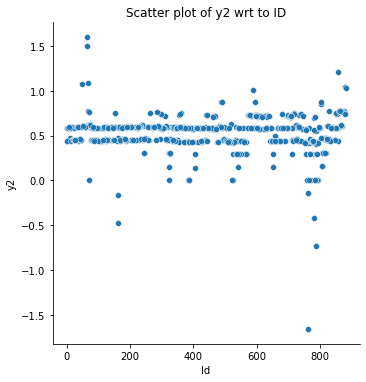

In [31]:
plt.figure(figsize=(10,8))
sns.relplot(x =  'Id', y = 'y2', data = train)
plt.title('Scatter plot of y2 wrt to ID')
plt.show()

In [32]:
train.corr()['Id']['y2']

-0.03618062519547908

- There is negligible correlation between Id and y2.

## Model building

In [33]:
X = train_avg.drop(['Id','y2'], axis=1)
y  = train_avg['y2']

In [34]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2, random_state=0)

### Linear Regression

In [35]:
lmodel = LinearRegression()

lmodel.fit(X_train, y_train)

linearmo = lmodel.predict(X_val)
l_rmse = np.sqrt(mean_squared_error(y_val, linearmo))

print("Linear regression:")
print('='*50)
print("RMSE: ", l_rmse)
print("R2 score ", r2_score(y_val, linearmo))

Linear regression:
RMSE:  0.16060196126100934
R2 score  0.1991615968499154


In [36]:
lmodel = LinearRegression()

selector = RFE(lmodel,40)

#Fitting the data with the above conditions

X_train_rfe = selector.fit_transform(X_train, y_train)
X_val_rfe=selector.transform(X_val)


lmodel.fit(X_train_rfe, y_train)
lr_pred = lmodel.predict(X_val_rfe)
lrmse = np.sqrt(mean_squared_error(y_val, lr_pred))

print("Linear regression with RFE:")
print('='*50)
print("RMSE: ", lrmse)
print("R2 score: ", r2_score(y_val, lr_pred))

Linear regression with RFE:
RMSE:  0.15764618050058093
R2 score:  0.22836821658871476


### Random Forest Regressor

In [37]:
rf_model = RandomForestRegressor(random_state=2)

rf_model.fit(X_train, y_train)
rf_pred  = rf_model.predict(X_val)

print("Random Forest Regressor:")
print('='*50)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred))
print("RMSE: ", rf_rmse)
print("R2 score: ", r2_score(y_val, rf_pred))

Random Forest Regressor:
RMSE:  0.1239863595662465
R2 score:  0.5227004563533928


In [38]:
rfe_model = RandomForestRegressor(random_state=2)

selector = RFE(rfe_model,30)
X_train_rfe = selector.fit_transform(X_train, y_train)
X_val_rfe=selector.transform(X_val)

rfe_model.fit(X_train_rfe, y_train)
prediction_rfe = rfe_model.predict(X_val_rfe)

print("Random Forest with RFE:")
print("="*50)
rmse_rd = np.sqrt(mean_squared_error(y_val, prediction_rfe))
print("RMSE: ", rmse_rd)
print("R2 score: ", r2_score(y_val, prediction_rfe))


Random Forest with RFE:
RMSE:  0.12827344710696914
R2 score:  0.4891225501063938


In [39]:
#RandomForestRegressor Model with hyperparameter tuning

rf = RandomForestRegressor(random_state=0)
parameter_grid = {"max_depth": [3, None],
              "max_features": [1, 5,9,11],
              "min_samples_split": [2, 3, 5],
              "min_samples_leaf": [1, 3, 5],
              "bootstrap": [True, False]}


grid_search = GridSearchCV(rf, param_grid=parameter_grid )

grid_search.fit(X_train_rfe, y_train)
predict = grid_search.predict(X_val_rfe)

print("Random Forest with hyperparameter tuning:")
print("="*50)
print("RMSE: ", np.sqrt(mean_squared_error(y_val, predict)))
print("R2 score: ", r2_score(y_val, predict)) 

Random Forest with hyperparameter tuning:
RMSE:  0.14594338148339298
R2 score:  0.3386794610411604


### Gradient Boosting Regressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=99)

gb_model.fit(X_train, y_train)
gb_score = gb_model.predict(X_val)

print("GRADIENT BOOSTING")
print("="*50)
rmse_gb = np.sqrt(mean_squared_error(y_val, gb_score))
print("RMSE: ", rmse_gb)
print("R2 score: ", r2_score(y_val, gb_score))


GRADIENT BOOSTING
RMSE:  0.12838520736202125
R2 score:  0.4882319422964013


### Voting Regressor (Ensembling)

In [41]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor

ada = AdaBoostRegressor(random_state=2)
rfr = RandomForestRegressor(random_state=0)
gbr = GradientBoostingRegressor(random_state=3)


Model_List=[('AdaBoostRegressor', ada),
            ('RandomForestRegressor', rfr),
           ('GradientBoostingRegressor', gbr)]

voting = VotingRegressor(Model_List, n_jobs=-1)

voting.fit(X_train, y_train)


VotingRegressor(estimators=[('AdaBoostRegressor',
                             AdaBoostRegressor(random_state=2)),
                            ('RandomForestRegressor',
                             RandomForestRegressor(random_state=0)),
                            ('GradientBoostingRegressor',
                             GradientBoostingRegressor(random_state=3))],
                n_jobs=-1)

In [42]:
predict_ensmble = voting.predict(X_val)
print("R2 score:",r2_score(y_val, predict_ensmble))

R2 score: 0.48091963685950445


### PCA

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

pca = PCA(n_components=30, random_state=0)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.fit_transform(X_val)

In [44]:
rf_pca = RandomForestRegressor(random_state=2)

rf_pca.fit(X_train_pca, y_train)
prediction_pca = rf_pca.predict(X_val_pca)

print("Random Forest with PCA: ")
print("="*50)
print("RMSE: ", np.sqrt(mean_squared_error(y_val, prediction_pca)))
print("R2 score: ", r2_score(y_val, prediction_pca))

Random Forest with PCA: 
RMSE:  0.20798533314883397
R2 score:  -0.3431008446553798


#### The best performing model based upon R2-score is the Random Forest Regressor(rf_model).

## Different Techniques to try and improve the model's performance.

### 1) Differencing the rows

It is given that the **row numbers are important as they are sorted time-wise**. Which means that the 1st row represents the 1st readings taken from the sensors for a batch of machines, the 2nd row represents the readings taken after that and so on. So let's try differencing the rows on 1st order to see if it improves the performance of the model.

In [45]:
X_train

x0        x1   x2         x3        x4          x5          x6  \
64   758.265129  1.297585  1.0  21.350230  6.471429  746.189906  838.489979   
631  753.794087  0.983485  1.0  26.107878  6.642857  736.215028  800.604307   
52   761.193930  0.353642  1.0  26.906107  6.557143  740.100323  827.347122   
647  752.595230  0.463039  1.0  26.607366  6.557143  744.950714  827.347122   
548  769.379206  0.809880  1.0  20.537289  6.557143  755.420922  786.375704   
..          ...       ...  ...        ...       ...         ...         ...   
763  768.143284  0.771061  1.0  17.782162  6.800000  760.556613  772.599976   
192  758.448518  0.830621  1.0  27.361636  6.728571  757.915478  789.804275   
629  760.809089  0.881512  1.0  22.484070  6.900000  739.022886  793.147153   
559  758.092817  0.561171  1.0  26.248996  6.500000  720.280591  845.599976   
684  765.377204  0.288371  1.0  25.470903  6.500000  751.032142  832.599976   

             x7        x8        x9        x10        x11         x12  \
64   837.325704  4.657143  0.232897  82.423659  47.413192  532.154703   
631  821.382868  4.485714  0.157996  81.575782   2.463315  546.048829   
52   838.011408  4.485714  0.248014  78.162566  40.128255  450.365853   
647  838.011408  4.485714  0.248045  83.001216  46.152581  471.794332   
548  807.240010  4.400000  0.263239  82.269364   6.074419  450.224857   
..          ...       ...       ...        ...        ...         ...   
763  758.599976  4.400000  0.324993  86.510338   5.098215  554.536302   
192  811.182847  4.400000  0.336374  81.999735  80.065940  448.644126   
629  815.468561  4.400000  0.292604  81.643361  23.218612  423.776807   
559  840.799988  4.500000  0.191305  82.079312  13.558358  445.394413   
684  841.599976  4.500000  0.277195  84.168210  44.015536  465.108581   

            x13       x14          x15        x16         x17   x18   x19  \
64   495.994387  0.900249  1353.464286  64.522857  697.816008  80.0  80.0   
631  556.264996  0.855046  1700.607143  55.951429  692.911087  80.0  80.0   
52   421.696123  0.901190  1700.607143  55.951429  699.474832  80.0  80.0   
647  438.847297  0.901242  1700.607143  55.951429  698.673628  80.0  80.0   
548  464.671899  0.882691  1349.178571  62.808571  698.285026  80.0  80.0   
..          ...       ...          ...        ...         ...   ...   ...   
763  549.866556  0.800315  1300.000000  66.000000  695.819127  80.0  80.0   
192  537.361894  0.901013  1700.607143  55.094286  699.413611  80.0  80.0   
629  455.987165  0.901498  1357.750000  64.522857  700.474373  80.0  80.0   
559  431.142570  0.900479  1700.000000  57.000000  695.247796  80.0  80.0   
684  422.805138  0.901331  1700.000000  56.000000  699.134872  80.0  80.0   

     x20        x21         x22       x23       x24  x25        x26  \
64   1.0  27.535266  795.410146  0.520146  0.714286  0.0  11.058764   
631  1.0  27.980265  776.679259  0.969513  0.857143  0.0  12.098166   
52   1.0  31.428571  751.988444  0.910398  0.714286  0.0  10.126744   
647  1.0  28.008920  746.820594  0.555107  0.428571  0.0  12.752072   
548  1.0  26.857143  789.101859  0.516337  0.714286  0.0  11.647963   
..   ...        ...         ...       ...       ...  ...        ...   
763  1.0  26.223250  782.119829  0.572041  0.785714  0.0  11.067667   
192  1.0  28.714286  782.370919  0.496615  0.857143  0.0  11.034887   
629  1.0  28.665729  777.933759  0.618071  0.428571  0.0  11.739756   
559  1.0  29.271389  783.435656  0.503993  0.500000  0.0  12.320714   
684  1.0  33.987242  786.721017  1.030591  0.642857  0.0   7.360813   

            x27       x28          x29         x30        x32        x31  \
64   812.242822  0.142857  3714.321419  421.332203  14.140000  14.607785   
631  797.866917  0.142857  2729.935426  427.866564  16.139999  20.019642   
52   774.208178  0.142857  1184.100000  414.790287  14.140000   7.862857   
647  805.453325  0.142857  4164.086371  410.290933  14.140000  14.130317   
548  846.165169  0.142857  35

In [46]:
train_diff = train_avg.drop(['Id', 'y2'], axis=1).diff()
train_diff.dropna(inplace=True)
train_diff.head()

x0        x1   x2        x3        x4         x5         x6  \
1  -2.877699  0.442298  0.0  4.839016 -0.228571   1.047583  55.795700   
2  -0.314054 -0.515276  0.0 -4.623937  0.400000  70.663879 -52.452822   
3   3.519442 -0.055840  0.0  6.047790  0.000000 -66.977820   0.000000   
4   8.229991  0.014401  0.0 -9.082605 -0.085714   7.557004 -17.228603   
5 -15.555305  0.638617  0.0  7.941514 -0.042857 -14.694519   7.714286   

          x7   x8        x9       x10         x11         x12         x13  \
1  29.617141  0.1  0.010613 -5.277101   36.286086   17.015558  -30.649471   
2 -25.331427 -0.1 -0.070298  5.441124  -45.207794  -67.538425    5.948868   
3   0.000000  0.0 -0.028395 -0.251310  109.142744    8.173340  114.401842   
4 -48.600010  0.0  0.109539  0.215750 -115.887797  103.904520  -10.791812   
5   5.485735  0.0  0.008665 -0.915943   12.921182  -59.192563  -45.531321   

        x14         x15       x16       x17  x18  x19  x20       x21  \
1  0.002724  342.250000 -6.665714 -2.784580  0.0  0.0  0.0  1.997805   
2  0.001184 -342.250000  7.522857  0.583993  0.0  0.0  0.0 -0.979281   
3 -0.000103  342.857143 -9.428571  3.794970  0.0  0.0  0.0 -1.020719   
4 -0.050336 -342.857143  9.428571 -3.171351  0.0  0.0  0.0 -0.305125   
5  0.050587  342.012104 -9.428571 -1.261101  0.0  0.0  0.0  1.164615   

         x22       x23       x24  x25       x26        x27       x28  \
1   3.050606 -0.127723  0.071429  0.0  1.523868  -1.686578 -0.071429   
2  -0.269747  0.103245 -0.071429  0.0 -1.207321 -18.598785  0.071429   
3 -57.454694 -0.058657 -0.142857  0.0  1.713452  -8.492100  0.000000   
4  80.472285 -0.003542  0.285714  0.0 -0.873344  39.326408  0.000000   
5 -21.290412 -0.076758 -0.285714  0.0 -4.011095  -7.677161  0.000000   

          x29         x30       x32       x31       x34       x33       x36  \
1  209.909627  -69.835285 -0.427143  1.966933  3.639474  3.850783  0.047143   
2 -332.055671  138.480725  0.427143  0.460414 -3.397143 -4.040631 -0.089144   
3  -41.518520   -8.666921  0.000000 -2.631471  0.142857  0.137298 -0.168004   
4   40.030204  -55.757874  0.000000  1.437084 -0.714286 -1.161803  0.210005   
5 -855.887836   86.584053  0.357143  4.237213  0.857143  0.638338 -0.700002   

         x35       x37  x38        x39       x40       x41  x42       x43  \
1   0.059360  0.000000  0.0   8.659789 -0.951973 -0.005876  0.0  0.071429   
2  -0.124227  0.142857  0.0  -2.782849  5.187402  0.007105  0.0 -0.785714   
3  -0.112579  0.000000  0.0  -5.050334 -1.798827 -0.003855  0.0  0.000000   
4   0.239268 -0.142857  0.0  40.424649 -0.663524  0.000975  0.0  0.714286   
5 -22.025094  0.000000  0.0 -38.050423  1.502925  0.027023  0.0 -0.714286   

        x44       x45       x46       x47         x48        x49       x50  \
1 -0.071429  0.000000 -1.137213  0.071429 -152.242935  13.044726  4.286503   
2  0.785714  0.142857  6.858684 -0.357143   -0.742284 -22.429590 -5.105250   
3  0.000000 -0.142857 -1.747187  0.285714   82.951341  27.426874  0.958739   
4 -0.714286  0.142857 -1.324233 -0.142857 -132.235408 -45.547417 -0.838861   
5  0.714286  0.000000  2.928694 -0.142857  162.280882  20.632367 -0.089483   

         x51        x52        x53       x54  
1   8.034520  65.686451 -15.366239  0.020800  
2 -24.765524 -35.782514  13.632465  0.139738  
3   9.928750 -22.857613   0.355268 -0.112717  
4 -16.057893 -13.192800  -1.272058  0.308435  
5  18.275143  34.642275   1.353905 -0.099834

In [47]:
train_diff = train_avg.drop(['Id', 'y2'], axis=1).diff()
train_diff.dropna(inplace=True)
train_diff.head()

x0        x1   x2        x3        x4         x5         x6  \
1  -2.877699  0.442298  0.0  4.839016 -0.228571   1.047583  55.795700   
2  -0.314054 -0.515276  0.0 -4.623937  0.400000  70.663879 -52.452822   
3   3.519442 -0.055840  0.0  6.047790  0.000000 -66.977820   0.000000   
4   8.229991  0.014401  0.0 -9.082605 -0.085714   7.557004 -17.228603   
5 -15.555305  0.638617  0.0  7.941514 -0.042857 -14.694519   7.714286   

          x7   x8        x9       x10         x11         x12         x13  \
1  29.617141  0.1  0.010613 -5.277101   36.286086   17.015558  -30.649471   
2 -25.331427 -0.1 -0.070298  5.441124  -45.207794  -67.538425    5.948868   
3   0.000000  0.0 -0.028395 -0.251310  109.142744    8.173340  114.401842   
4 -48.600010  0.0  0.109539  0.215750 -115.887797  103.904520  -10.791812   
5   5.485735  0.0  0.008665 -0.915943   12.921182  -59.192563  -45.531321   

        x14         x15       x16       x17  x18  x19  x20       x21  \
1  0.002724  342.250000 -6.665714 -2.784580  0.0  0.0  0.0  1.997805   
2  0.001184 -342.250000  7.522857  0.583993  0.0  0.0  0.0 -0.979281   
3 -0.000103  342.857143 -9.428571  3.794970  0.0  0.0  0.0 -1.020719   
4 -0.050336 -342.857143  9.428571 -3.171351  0.0  0.0  0.0 -0.305125   
5  0.050587  342.012104 -9.428571 -1.261101  0.0  0.0  0.0  1.164615   

         x22       x23       x24  x25       x26        x27       x28  \
1   3.050606 -0.127723  0.071429  0.0  1.523868  -1.686578 -0.071429   
2  -0.269747  0.103245 -0.071429  0.0 -1.207321 -18.598785  0.071429   
3 -57.454694 -0.058657 -0.142857  0.0  1.713452  -8.492100  0.000000   
4  80.472285 -0.003542  0.285714  0.0 -0.873344  39.326408  0.000000   
5 -21.290412 -0.076758 -0.285714  0.0 -4.011095  -7.677161  0.000000   

          x29         x30       x32       x31       x34       x33       x36  \
1  209.909627  -69.835285 -0.427143  1.966933  3.639474  3.850783  0.047143   
2 -332.055671  138.480725  0.427143  0.460414 -3.397143 -4.040631 -0.089144   
3  -41.518520   -8.666921  0.000000 -2.631471  0.142857  0.137298 -0.168004   
4   40.030204  -55.757874  0.000000  1.437084 -0.714286 -1.161803  0.210005   
5 -855.887836   86.584053  0.357143  4.237213  0.857143  0.638338 -0.700002   

         x35       x37  x38        x39       x40       x41  x42       x43  \
1   0.059360  0.000000  0.0   8.659789 -0.951973 -0.005876  0.0  0.071429   
2  -0.124227  0.142857  0.0  -2.782849  5.187402  0.007105  0.0 -0.785714   
3  -0.112579  0.000000  0.0  -5.050334 -1.798827 -0.003855  0.0  0.000000   
4   0.239268 -0.142857  0.0  40.424649 -0.663524  0.000975  0.0  0.714286   
5 -22.025094  0.000000  0.0 -38.050423  1.502925  0.027023  0.0 -0.714286   

        x44       x45       x46       x47         x48        x49       x50  \
1 -0.071429  0.000000 -1.137213  0.071429 -152.242935  13.044726  4.286503   
2  0.785714  0.142857  6.858684 -0.357143   -0.742284 -22.429590 -5.105250   
3  0.000000 -0.142857 -1.747187  0.285714   82.951341  27.426874  0.958739   
4 -0.714286  0.142857 -1.324233 -0.142857 -132.235408 -45.547417 -0.838861   
5  0.714286  0.000000  2.928694 -0.142857  162.280882  20.632367 -0.089483   

         x51        x52        x53       x54  
1   8.034520  65.686451 -15.366239  0.020800  
2 -24.765524 -35.782514  13.632465  0.139738  
3   9.928750 -22.857613   0.355268 -0.112717  
4 -16.057893 -13.192800  -1.272058  0.308435  
5  18.275143  34.642275   1.353905 -0.099834

In [48]:
train_diff.shape

(793, 55)

In [49]:
X = train_diff
y = train_avg['y2'].drop(index=0)
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2, random_state=0)

In [50]:
rf_model_2 = RandomForestRegressor(random_state=2)

rf_model_2.fit(X_train, y_train)
rf_pred_2  = rf_model_2.predict(X_val)

print("Random Forest Regressor with differenced rows:")
print('='*50)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred_2))
print("RMSE: ", rf_rmse)
print("R2 score: ", r2_score(y_val, rf_pred_2))

Random Forest Regressor with differenced rows:
RMSE:  0.1762147085858969
R2 score:  -0.026729060335902277


### 2) Differencing the columns

Each sensor has 7 readings taken at 7 different time stamps t0, t1,...,t6. Assuming that t0 is the first time stamp and the time progresses from t0 to t6, we try differencing the columns for each sensor, to drop the (t0)th and retain the difference for the remaining. 

In [51]:
new_train = train.drop(['Id', 'y2'], axis=1)

diff_data = pd.DataFrame()
for i in range(0,len(new_train.columns.to_list()),7):
    count=0
    j=i
    col_list=[]
    while count <= 6:
        col = new_train.columns.to_list()[j]
        col_list.append(col)
        count += 1
        j += 1
    subset = new_train[col_list]
    diff_data = pd.concat([diff_data, subset.diff(axis=1)], axis=1)
    

In [52]:
diff_data.dropna(axis=1, inplace=True)
diff_data.head()

x0_t1     x0_t2      x0_t3     x0_t4     x0_t5      x0_t6     x1_t1  \
0  -9.049463  1.447866   8.176516  5.383212  1.645139 -18.865486 -0.029220   
1 -16.039898 -0.824050  10.185054  5.821461  4.296398  -3.575557 -0.007821   
2 -10.224814 -6.583266   6.318284  3.709613 -1.707319  -7.430275  0.003631   
3   7.153578  3.160301   1.798888  5.525137  1.732622 -19.497814  0.031903   
4  -0.176470  0.068252  -0.396335 -3.106188  4.088150 -21.958223 -0.066398   

      x1_t2     x1_t3     x1_t4     x1_t5     x1_t6  x2_t1  x2_t2  x2_t3  \
0 -0.066045  0.055641 -0.026880  0.066796  0.473174    0.0    0.0    0.0   
1 -0.053810  0.065310  0.114011 -0.073229 -0.046711    0.0    0.0    0.0   
2 -0.049762  0.116520 -0.127126 -0.168970  0.780275    0.0    0.0    0.0   
3 -0.022852 -0.016025 -0.021846  0.029566  0.662379    0.0    0.0    0.0   
4  0.058503 -0.129793  0.167136  0.081062  0.522827    0.0    0.0    0.0   

   x2_t4  x2_t5  x2_t6     x3_t1     x3_t2     x3_t3     x3_t4      x3_t5  \
0    0.0    0.0    0.0 -0.217918  0.404859 -0.715264  0.400945  -0.266985   
1    0.0    0.0    0.0 -0.017589 -0.105738  0.234400 -0.317603   0.258829   
2    0.0    0.0    0.0  3.769298  0.183752 -0.000290 -0.203037   0.286082   
3    0.0    0.0    0.0  0.146378 -0.253087  0.221904 -0.245229   0.280422   
4    0.0    0.0    0.0 -0.148422 -0.032408  1.249513  0.102493 -10.622616   

       x3_t6  x4_t1  x4_t2  x4_t3  x4_t4  x4_t5         x4_t6      x5_t1  \
0   7.031639    0.0    0.0    0.0    0.0    0.0  2.000002e-01  -3.138420   
1  -0.148255    0.0    0.0    0.0    0.0    0.0  0.000000e+00  35.964707   
2   5.774158    0.0    0.0    0.0    0.0    0.0 -9.536743e-08   6.209619   
3  -0.610415    0.0    0.0    0.0    0.0    0.0 -9.536743e-08   3.991409   
4  18.301777    0.0    0.0    0.0    0.0    0.0  9.999981e-02   0.965960   

       x5_t2      x5_t3       x5_t4      x5_t5       x5_t6  x6_t1  x6_t2  \
0   0.087408   1.544057    6.167132  -0.719834   -6.413959    0.0    0.0   
1  -3.942473  -7.358680    8.976996   2.225245    2.376529    0.0    0.0   
2 -10.190061  14.159154  227.486118 -64.608392 -188.822589    0.0    0.0   
3   7.497940  -1.806091   -1.119469  -4.029389   -6.304253    0.0    0.0   
4   1.329526   1.491423    2.087068  -2.826173  -17.349507    0.0    0.0   

   x6_t3  x6_t4  x6_t5      x6_t6  x7_t1  x7_t2  x7_t3  x7_t4  x7_t5  \
0    0.0    0.0    0.0   7.030012    0.0    0.0    0.0    0.0    0.0   
1    0.0    0.0    0.0   0.000000    0.0    0.0    0.0    0.0    0.0   
2    0.0    0.0    0.0   3.129988    0.0    0.0    0.0    0.0    0.0   
3    0.0    0.0    0.0   3.129988    0.0    0.0    0.0    0.0    0.0   
4    0.0    0.0    0.0  23.230024    0.0    0.0    0.0    0.0    0.0   

       x7_t6  x8_t1  x8_t2  x8_t3  x8_t4  x8_t5         x8_t6     x9_t1  \
0   6.180012    0.0    0.0    0.0    0.0    0.0 -9.536743e-08  0.000077   
1   0.000000    0.0    0.0    0.0    0.0    0.0  0.000000e+00  0.140655   
2   1.180012    0.0    0.0    0.0    0.0    0.0 -9.536743e-08  0.067488   
3   1.180012    0.0    0.0    0.0    0.0    0.0 -9.536743e-08 -0.026016   
4  57.880024    0.0    0.0    0.0    0.0    0.0 -9.536743e-08 -0.009422   

      x9_t2     x9_t3     x9_t4     x9_t5     x9_t6     x10_t1    x10_t2  \
0  0.001308  0.002748  0.087021 -0.077769  0.052636   0.107843  0.041853   
1 -0.053532 -0.047494 -0.032378  0.136722 -0.120264  39.888193 -2.844023   
2  0.029303  0.137607  0.002459 -0.081270  0.093565  -1.265263  0.058690   
3  0.010541  0.019798 -0.043886  0.021350  0.152816   0.030578 -0.071724   
4  0.022438 -0.021550 -0.050303 -0.098955  0.143495   0.085379 -0.014000   

     x10_t3    x10_t4    x10_t5    x10_t6    x11_t1    x11_t2    x11_t3  \
0 -0.036609 -0.051152 -0.033399 -0.518582 -1.482775  2.956731  4.452224   
1 -0.032897 -0.010962  0.142001 -0.110387 -1.677942 -1.653709 -2.585182   
2  2.642351  0.010357 -0.029145 -1.870734 -0.693274 -2.894034  7.763339   
3  0.168520 -0.106770  3.918834 -3.725024  3.870821  4.737862  

In [53]:
X = diff_data
y = train_avg['y2']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2, random_state=0)

In [54]:
rf_model_3 = RandomForestRegressor(random_state=2)

rf_model_3.fit(X_train, y_train)
rf_pred_3  = rf_model_3.predict(X_val)

print("Random Forest Regressor with differenced columns:")
print('='*50)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred_3))
print("RMSE: ", rf_rmse)
print("R2 score: ", r2_score(y_val, rf_pred_3))

Random Forest Regressor with differenced columns:
RMSE:  0.1709386785484765
R2 score:  0.09275645586901293


#### Averaging the above differenced columns

In [55]:
# averaging the differenced columns
new_diff = pd.DataFrame()
for  i in range(0, len(diff_data.columns.tolist()), 6):
     new_diff[diff_data.columns.tolist()[i].split('_')[0]] = np.mean(diff_data.iloc[:, i:i+6], axis = 1)
        
new_diff.head()

x0        x1   x2        x3            x4        x5        x6  \
0 -1.877036  0.078911  0.0  1.106213  3.333337e-02 -0.412269  1.171669   
1 -0.022765 -0.000375  0.0 -0.015993  0.000000e+00  6.373720  0.000000   
2 -2.652963  0.092428  0.0  1.634994 -1.589457e-08 -2.627692  0.521665   
3 -0.021215  0.110521  0.0 -0.076671 -1.589457e-08 -0.294976  0.521665   
4 -3.580136  0.105556  0.0  1.475056  1.666663e-02 -2.383617  3.871671   

         x7            x8        x9       x10        x11        x12  \
0  1.030002 -1.589457e-08  0.011004 -0.081674  -0.979509  -8.630762   
1  0.000000  0.000000e+00  0.003951  6.171987  -0.965348  -0.445695   
2  0.196669 -1.589457e-08  0.041526 -0.075624  -0.167516   1.599504   
3  0.196669 -1.589457e-08  0.022434  0.035736 -19.869163   0.153304   
4  9.646671 -1.589457e-08 -0.002383 -0.157077   1.546810 -20.353921   

         x13       x14        x15       x16       x17  x18  x19  x20  \
0   5.778992  0.000498  67.375000 -1.556667 -0.833050  0.0  0.0  0.0   
1   0.157210  0.000004   0.000000  0.000000  0.208394  0.0  0.0  0.0   
2  12.077858 -0.000282  67.375000 -1.723333 -0.022297  0.0  0.0  0.0   
3  -9.115358 -0.000227   0.708333  0.110000  0.225275  0.0  0.0  0.0   
4  -8.333252  0.016619  67.375000 -1.723333 -0.098907  0.0  0.0  0.0   

        x21       x22       x23       x24  x25       x26       x27       x28  \
0  0.000000  4.015337  0.030406 -0.083333  0.0 -0.505964 -8.250733  0.083333   
1  0.000000 -2.737828  0.019183  0.083333  0.0 -0.144315 -3.546833  0.083333   
2 -0.264010 -3.749678 -0.006569  0.083333  0.0 -0.302265 -2.516833  0.083333   
3  0.000000  2.420224 -0.003029 -0.083333  0.0 -0.792057  3.484334  0.083333   
4  0.012077 -5.605705  0.004163 -0.083333  0.0 -0.294505 -6.209431  0.083333   

          x29        x30       x32       x31       x34       x33       x36  \
0    2.106853  25.483987 -0.001667  0.053508  0.203333  0.144668 -0.055000   
1   -7.777120  33.646085  0.081667  0.169671 -0.463333 -0.569066 -0.055000   
2  400.295241   8.921050 -0.001667 -0.035328  1.036667  1.159656 -0.005999   
3   16.817047   9.772839 -0.001667  0.073371  0.036667  0.009637 -0.005999   
4  413.065958  22.616946 -0.001667 -1.625629  1.036667  1.157168 -0.055000   

        x35       x37  x38       x39       x40       x41  x42       x43  \
0 -0.103653  0.000000  0.0  0.283556  0.791950  0.000560  0.0 -0.083333   
1 -0.088194  0.000000  0.0 -1.562677  0.592134  0.001358  0.0 -0.083333   
2 -0.048307  0.000000  0.0 -1.288367 -0.134403 -0.000956  0.0  0.083333   
3 -0.055756 -0.166667  0.0  0.805056  0.278264  0.001147  0.0  0.083333   
4 -0.110945  0.000000  0.0 -9.884437  0.278577  0.000583  0.0 -0.083333   

        x44       x45       x46       x47        x48        x49       x50  \
0  0.083333  0.000000  1.201326 -0.083333   2.325556  -0.984840 -0.037088   
1  0.083333  0.000000  1.191372 -0.083333  84.754214   6.445375 -0.838684   
2 -0.083333 -0.166667 -1.053122  0.083333  85.517066  17.549628  0.122152   
3 -0.083333  0.000000  0.251683 -0.083333   0.171359  -0.290469  0.030363   
4  0.083333  0.000000  0.202999  0.083333 -14.825582  23.399781  0.095702   

        x51        x52       x53       x54  
0  2.425222   3.400680 -0.396465  0.040294  
1 -2.186535 -11.634089  2.490460  0.018322  
2 -1.464384  -3.017030 -0.117530 -0.009136  
3  2.009065   0.925842 -0.606864  0.029391  
4  7.221024   5.258335  0.393290 -0.030319

In [56]:
X = new_diff
y = train_avg['y2']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2, random_state=0)

rf_model3 = RandomForestRegressor(random_state=2)

rf_model3.fit(X_train, y_train)
rf_pred3  = rf_model3.predict(X_val)

print("Random Forest Regressor with differenced columns after averaging:")
print('='*60)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred3))
print("RMSE: ", rf_rmse)
print("R2 score: ", r2_score(y_val, rf_pred3))

Random Forest Regressor with differenced columns after averaging:
RMSE:  0.16718409880452673
R2 score:  0.13217303791253032


### 3) Using the original dataframe without any feature engineering

In [57]:
X = train.drop(['y2'], axis=1)
y = train['y2']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2, random_state=0)

rf_model_4 = RandomForestRegressor(random_state=2)

rf_model_4.fit(X_train, y_train)
rf_pred_4  = rf_model_4.predict(X_val)

print("Random Forest Regressor with original data:")
print('='*50)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred_4))
print("RMSE: ", rf_rmse)
print("R2 score: ", r2_score(y_val, rf_pred_4))

Random Forest Regressor with original data:
RMSE:  0.1447068165889071
R2 score:  0.3498386013464867


### 4) Rebuilding the model with only important features.

In [58]:
feature_list = train_avg.drop(['y2'], axis=1).columns.to_list()

importances = list(rf_model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: x11                  Importance: 0.1
Variable: x5                   Importance: 0.08
Variable: x8                   Importance: 0.08
Variable: x6                   Importance: 0.05
Variable: x2                   Importance: 0.04
Variable: x12                  Importance: 0.04
Variable: x30                  Importance: 0.04
Variable: x4                   Importance: 0.03
Variable: x13                  Importance: 0.03
Variable: x20                  Importance: 0.03
Variable: x25                  Importance: 0.03
Variable: x36                  Importance: 0.03
Variable: x10                  Importance: 0.02
Variable: x15                  Importance: 0.02
Variable: x21                  Importance: 0.02
Variable: x22                  Importance: 0.02
Variable: x26                  Importance: 0.02
Variable: x28                  Importance: 0.02
Variable: x32                  Importance: 0.02
Variable: x38                  Importance: 0.02
Variable: x45                  Importance

In [59]:
# creating a list of most important features
final_features = []
for i in range(0, len(feature_importances)):
    if feature_importances[i][1] > 0.01:
        final_features.append(feature_importances[i][0])
        
final_features

['x11',
 'x5',
 'x8',
 'x6',
 'x2',
 'x12',
 'x30',
 'x4',
 'x13',
 'x20',
 'x25',
 'x36',
 'x10',
 'x15',
 'x21',
 'x22',
 'x26',
 'x28',
 'x32',
 'x38',
 'x45',
 'x48',
 'x51',
 'x52',
 'x53']

In [60]:
X = train_avg[final_features]
y = train_avg['y2']
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2, random_state=0)

rf_model_5 = RandomForestRegressor(random_state=2)

rf_model_5.fit(X_train, y_train)
rf_pred_5  = rf_model_5.predict(X_val)

print("Random Forest Regressor with selected features:")
print('='*50)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred_5))
print("RMSE: ", rf_rmse)
print("R2 score: ", r2_score(y_val, rf_pred_5))

Random Forest Regressor with selected features:
RMSE:  0.11874845963913243
R2 score:  0.5621763960609032


### Final Model: rf_model_5
The Random Forest Regressor model with selected important features has given best R2 score so far, hence we move ahead with this model and use it to obtain predictions on the test data.

# Test Data Predictions

In [61]:
X_test = test_avg[final_features]

In [62]:
y_pred  = rf_model_5.predict(X_test)

In [63]:
y_pred_df = pd.DataFrame(y_pred, columns = ['y2'])

submission_file = pd.concat([test_avg['Id'], y_pred_df], axis=1)

submission_file.to_csv('submission_file.csv', index=False)

In [64]:
submission_file.head(10)

Id      y2
0  584  0.5975
1  678  0.4942
2  728  0.5582
3  338  0.5280
4  570  0.3039
5  141  0.5564
6  612  0.5817
7   55  0.6197
8  333  0.4599
9  372  0.5224